# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

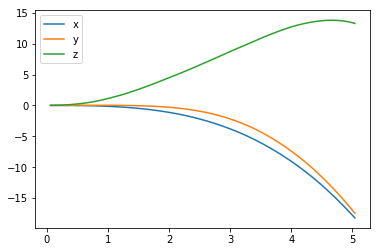

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

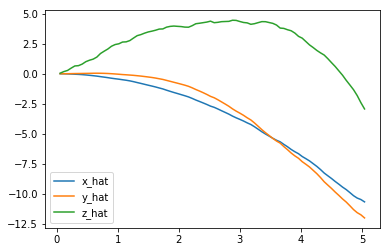

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

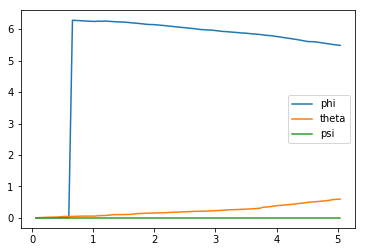

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

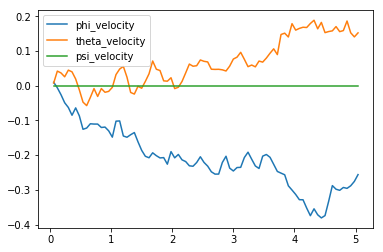

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

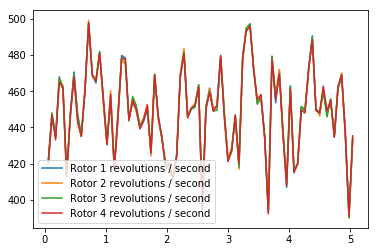

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-18.21076553 -17.44425317  13.26920837   5.48390459   0.59975771   0.        ]
[-10.68962872 -12.02835981  -2.93553302]
[-0.25615555  0.15232876  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Check the Version of TensorFlow and Access to GPU

This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/ericness/anaconda3/envs/quadcopter/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


In [11]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

## Create Plotting Functions

In [12]:
import matplotlib.pyplot as plt

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# initialize plot
def plt_init(time_limit, y1_lower, y1_upper, y2_lower, y2_upper):
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook



# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =    1, total reward = -2242.917
Episode =    2, total reward = -1947.534
Episode =    3, total reward = -2388.923
Episode =    4, total reward = -2362.105
Episode =    5, total reward = -2420.779
Episode =    6, total reward = -2022.022
Episode =    7, total reward = -1955.548
Episode =    8, total reward = -2407.191
Episode =    9, total reward = -2193.418
Episode =   10, total reward = -2128.938
Episode =   11, total reward = -2315.942
Episode =   12, total reward = -2427.123
Episode =   13, total reward = -1663.629
Episode =   14, total reward = -2402.362
Episode =   15, total reward = -2363.330
Episode =   16, total reward = -1813.244
Episode =   17, total reward = -2397.267
Episode =   18, total reward = -1770.342
Episode =   19, total reward = -1929.945
Episode =   20, total r

<IPython.core.display.Javascript object>


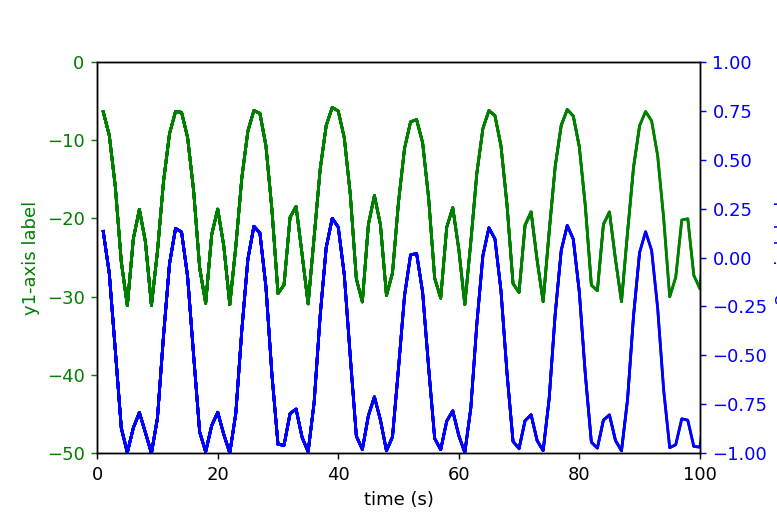

Episode =   30, total reward = -1891.450
Episode =   31, total reward = -2330.853
Episode =   32, total reward = -2390.260
Episode =   33, total reward = -1944.648
Episode =   34, total reward = -1674.337
Episode =   35, total reward = -2360.599
Episode =   36, total reward = -2258.340
Episode =   37, total reward = -2315.653
Episode =   38, total reward = -2375.407
Episode =   39, total reward = -2152.037
Episode =   40, total reward = -2423.517
Episode =   41, total reward = -2242.765
Episode =   42, total reward = -2421.825
Episode =   43, total reward = -2441.910
Episode =   44, total reward = -1943.057
Episode =   45, total reward = -2235.953
Episode =   46, total reward = -2284.340
Episode =   47, total reward = -2131.940
Episode =   48, total reward = -2259.374
Episode =   49, total reward = -2354.972
Episode =   50, total reward = -2392.972
Episode =   51, total reward = -2428.449
Episode =   52, total reward = -2323.395
Episode =   53, total reward = -2351.511
Episode =   54, 

<IPython.core.display.Javascript object>


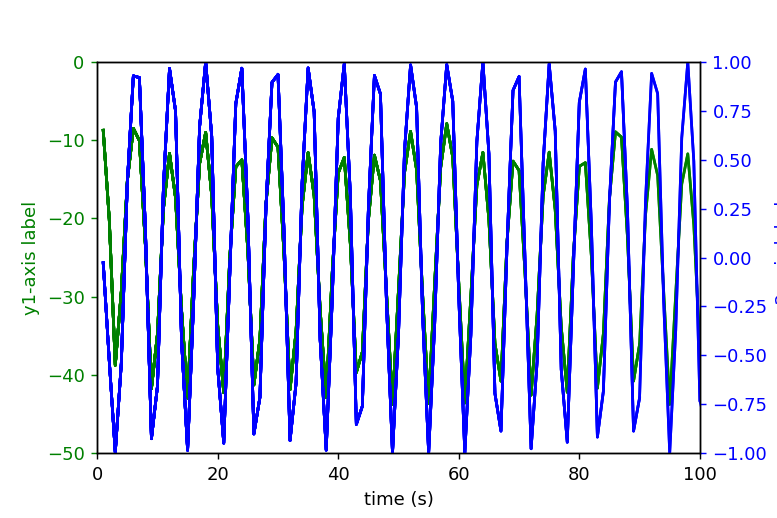

Episode =   60, total reward = -2445.377
Episode =   61, total reward = -1877.667
Episode =   62, total reward = -1853.510
Episode =   63, total reward = -2352.468
Episode =   64, total reward = -2169.742
Episode =   65, total reward = -2132.175
Episode =   66, total reward = -2334.482
Episode =   67, total reward = -2422.828
Episode =   68, total reward = -2409.159
Episode =   69, total reward = -2366.186
Episode =   70, total reward = -1935.747
Episode =   71, total reward = -2361.432
Episode =   72, total reward = -1708.604
Episode =   73, total reward = -2080.418
Episode =   74, total reward = -2283.883
Episode =   75, total reward = -2396.367
Episode =   76, total reward = -1632.481
Episode =   77, total reward = -2321.040
Episode =   78, total reward = -2446.280
Episode =   79, total reward = -2036.722
Episode =   80, total reward = -2248.301
Episode =   81, total reward = -2379.363
Episode =   82, total reward = -2062.543
Episode =   83, total reward = -2470.254
Episode =   84, 

<IPython.core.display.Javascript object>


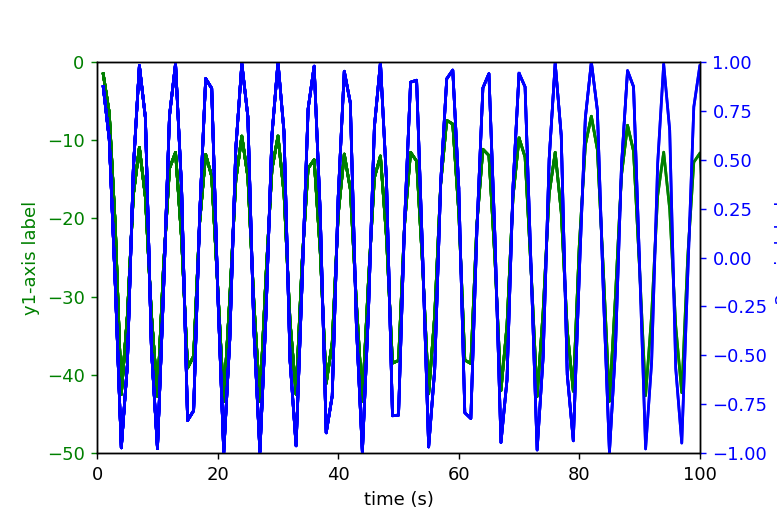

Episode =   90, total reward = -2375.216
Episode =   91, total reward = -2101.755
Episode =   92, total reward = -2089.385
Episode =   93, total reward = -2084.258
Episode =   94, total reward = -1939.308
Episode =   95, total reward = -2354.785
Episode =   96, total reward = -2317.225
Episode =   97, total reward = -2023.788
Episode =   98, total reward = -2358.510
Episode =   99, total reward = -2447.127
Episode =  100, total reward = -2459.448
Episode =  101, total reward = -2169.722
Episode =  102, total reward = -1404.044
Episode =  103, total reward = -1840.764
Episode =  104, total reward = -1974.322
Episode =  105, total reward = -2333.180
Episode =  106, total reward = -2062.369
Episode =  107, total reward = -2339.726
Episode =  108, total reward = -2447.254
Episode =  109, total reward = -2118.665
Episode =  110, total reward = -2010.332
Episode =  111, total reward = -1908.898
Episode =  112, total reward = -2119.710
Episode =  113, total reward = -2150.077
Episode =  114, 

<IPython.core.display.Javascript object>


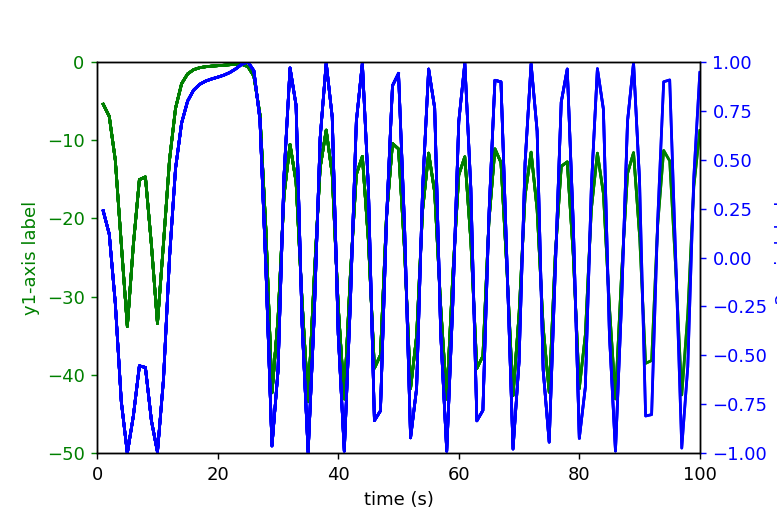

Episode =  120, total reward = -2052.750
Episode =  121, total reward = -2332.360
Episode =  122, total reward = -1849.060
Episode =  123, total reward = -2314.922
Episode =  124, total reward = -1960.753
Episode =  125, total reward = -2355.780
Episode =  126, total reward = -2470.625
Episode =  127, total reward = -1972.540
Episode =  128, total reward = -1923.221
Episode =  129, total reward = -1772.349
Episode =  130, total reward = -1521.678
Episode =  131, total reward = -2444.228
Episode =  132, total reward = -2268.483
Episode =  133, total reward = -2105.997
Episode =  134, total reward = -2205.138
Episode =  135, total reward = -2425.649
Episode =  136, total reward = -2410.554
Episode =  137, total reward = -2432.528
Episode =  138, total reward = -2458.748
Episode =  139, total reward = -2232.280
Episode =  140, total reward = -2188.172
Episode =  141, total reward = -2115.344
Episode =  142, total reward = -2000.640
Episode =  143, total reward = -1912.624
Episode =  144, 

<IPython.core.display.Javascript object>


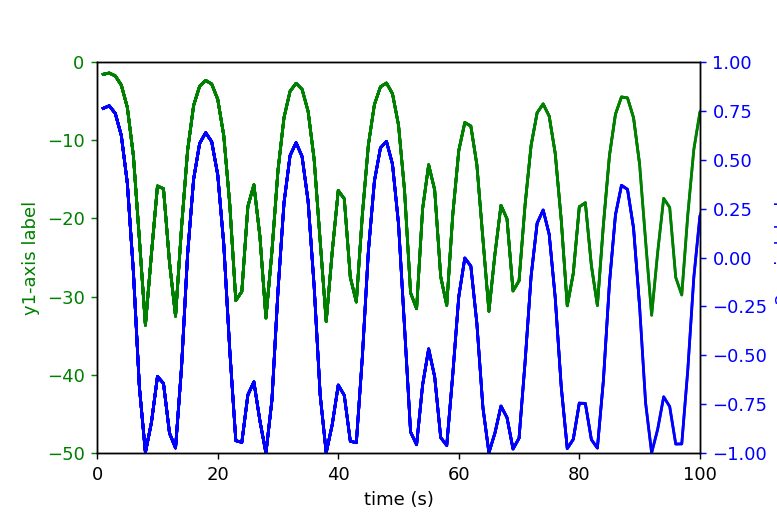

Episode =  150, total reward = -1659.009
Episode =  151, total reward = -1789.932
Episode =  152, total reward = -2308.872
Episode =  153, total reward = -1853.376
Episode =  154, total reward = -2303.066
Episode =  155, total reward = -2103.419
Episode =  156, total reward = -1939.486
Episode =  157, total reward = -2388.855
Episode =  158, total reward = -2166.401
Episode =  159, total reward = -2130.383
Episode =  160, total reward = -2066.662
Episode =  161, total reward = -2159.623
Episode =  162, total reward = -2322.664
Episode =  163, total reward = -2329.607
Episode =  164, total reward = -2010.698
Episode =  165, total reward = -2431.081
Episode =  166, total reward = -2374.378
Episode =  167, total reward = -1731.458
Episode =  168, total reward = -2123.361
Episode =  169, total reward = -1750.839
Episode =  170, total reward = -2350.290
Episode =  171, total reward = -2343.034
Episode =  172, total reward = -2376.199
Episode =  173, total reward = -1833.023
Episode =  174, 

<IPython.core.display.Javascript object>


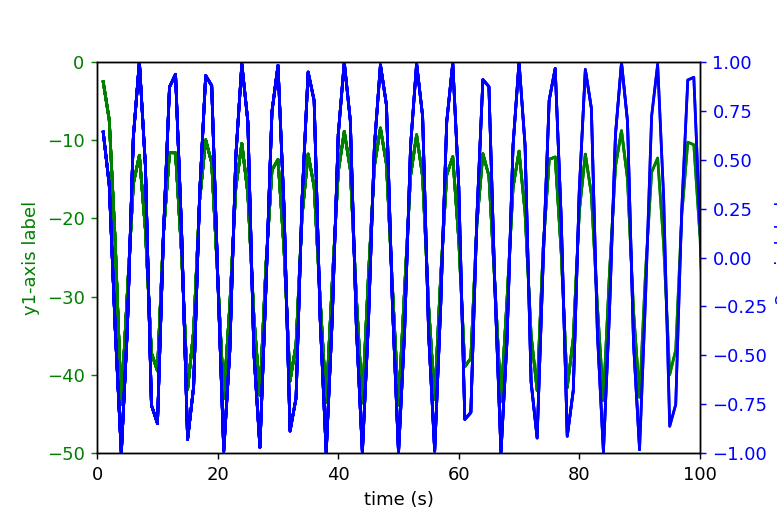

Episode =  180, total reward = -2423.607
Episode =  181, total reward = -2244.009
Episode =  182, total reward = -2176.606
Episode =  183, total reward = -1791.530
Episode =  184, total reward = -1749.970
Episode =  185, total reward = -2137.368
Episode =  186, total reward = -2150.014
Episode =  187, total reward = -2391.700
Episode =  188, total reward = -2046.671
Episode =  189, total reward = -2220.259
Episode =  190, total reward = -2367.216
Episode =  191, total reward = -1778.304
Episode =  192, total reward = -2129.295
Episode =  193, total reward = -2346.162
Episode =  194, total reward = -1849.075
Episode =  195, total reward = -2277.506
Episode =  196, total reward = -1887.639
Episode =  197, total reward = -2332.922
Episode =  198, total reward = -2442.744
Episode =  199, total reward = -2463.277
Episode =  200, total reward = -2151.474
Episode =  201, total reward = -2227.331
Episode =  202, total reward = -2373.531
Episode =  203, total reward = -2067.367
Episode =  204, 

<IPython.core.display.Javascript object>


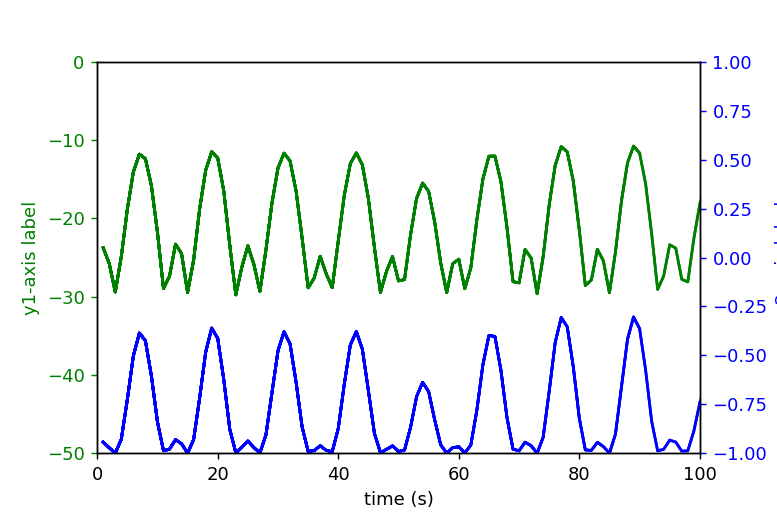

Episode =  210, total reward = -2166.478
Episode =  211, total reward = -2193.301
Episode =  212, total reward = -2332.908
Episode =  213, total reward = -2423.824
Episode =  214, total reward = -2436.542
Episode =  215, total reward = -1843.251
Episode =  216, total reward = -2376.484
Episode =  217, total reward = -2417.452
Episode =  218, total reward = -2192.110
Episode =  219, total reward = -2180.590
Episode =  220, total reward = -2389.962
Episode =  221, total reward = -2306.287
Episode =  222, total reward = -2479.142
Episode =  223, total reward = -2316.224
Episode =  224, total reward = -2135.696
Episode =  225, total reward = -1911.074
Episode =  226, total reward = -2322.762
Episode =  227, total reward = -2354.166
Episode =  228, total reward = -1638.367
Episode =  229, total reward = -1810.996
Episode =  230, total reward = -2390.545
Episode =  231, total reward = -1968.166
Episode =  232, total reward = -1737.292
Episode =  233, total reward = -2145.791
Episode =  234, 

<IPython.core.display.Javascript object>


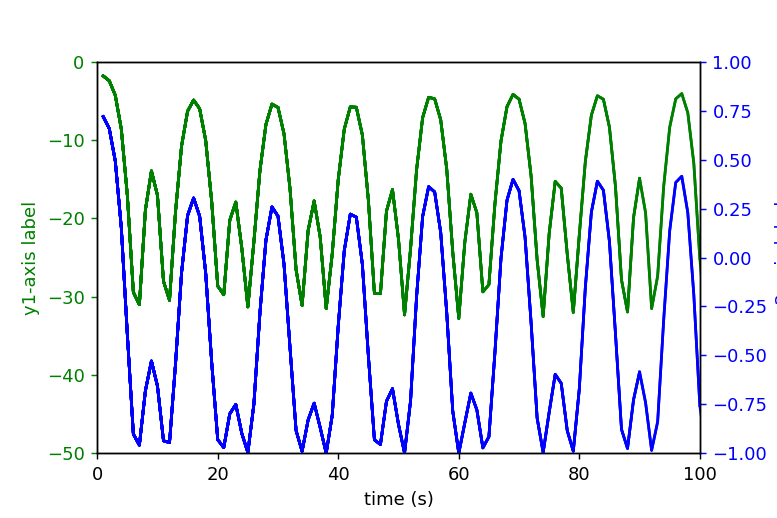

Episode =  240, total reward = -1741.153
Episode =  241, total reward = -2303.455
Episode =  242, total reward = -2333.230
Episode =  243, total reward = -2399.041
Episode =  244, total reward = -2327.690
Episode =  245, total reward = -2293.634
Episode =  246, total reward = -1813.138
Episode =  247, total reward = -2455.574
Episode =  248, total reward = -2127.645
Episode =  249, total reward = -2207.900
Episode =  250, total reward = -2324.262
Episode =  251, total reward = -1765.771
Episode =  252, total reward = -1866.357
Episode =  253, total reward = -1939.873
Episode =  254, total reward = -2436.513
Episode =  255, total reward = -2344.271
Episode =  256, total reward = -2468.330
Episode =  257, total reward = -2159.004
Episode =  258, total reward = -1794.430
Episode =  259, total reward = -2367.958
Episode =  260, total reward = -2342.508
Episode =  261, total reward = -1785.151
Episode =  262, total reward = -2381.126
Episode =  263, total reward = -2230.380
Episode =  264, 

<IPython.core.display.Javascript object>


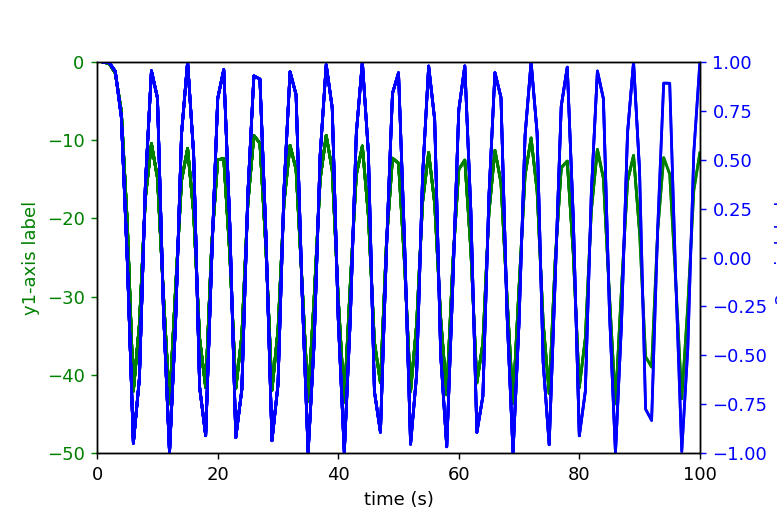

Episode =  270, total reward = -2381.330
Episode =  271, total reward = -2468.936
Episode =  272, total reward = -1905.740
Episode =  273, total reward = -2337.123
Episode =  274, total reward = -2266.939
Episode =  275, total reward = -1907.619
Episode =  276, total reward = -1920.167
Episode =  277, total reward = -2157.684
Episode =  278, total reward = -2349.989
Episode =  279, total reward = -1744.724
Episode =  280, total reward = -2319.394
Episode =  281, total reward = -1960.304
Episode =  282, total reward = -2270.213
Episode =  283, total reward = -2437.835
Episode =  284, total reward = -2292.518
Episode =  285, total reward = -2140.858
Episode =  286, total reward = -2327.221
Episode =  287, total reward = -2374.892
Episode =  288, total reward = -2025.114
Episode =  289, total reward = -2359.864
Episode =  290, total reward = -2338.050
Episode =  291, total reward = -2368.905
Episode =  292, total reward = -2449.268
Episode =  293, total reward = -2408.841
Episode =  294, 

<IPython.core.display.Javascript object>


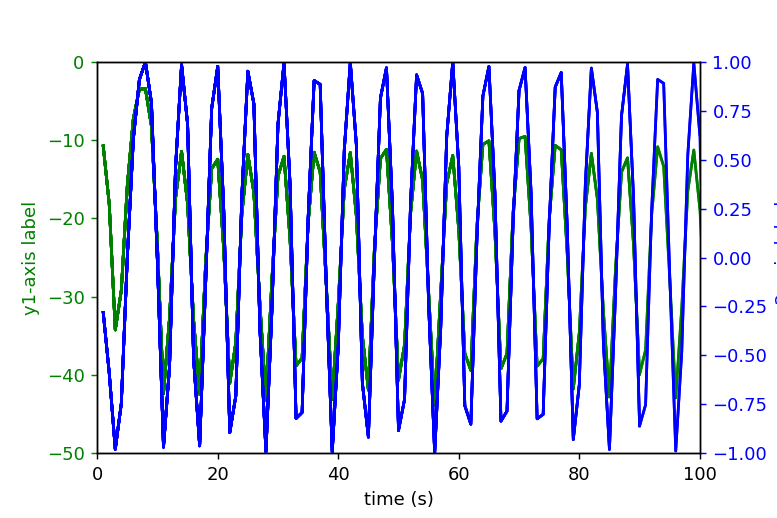

Episode =  300, total reward = -2397.608
Episode =  301, total reward = -2319.054
Episode =  302, total reward = -2051.772
Episode =  303, total reward = -1882.119
Episode =  304, total reward = -1835.277
Episode =  305, total reward = -2328.712
Episode =  306, total reward = -2124.860
Episode =  307, total reward = -2401.546
Episode =  308, total reward = -1925.624
Episode =  309, total reward = -2279.637
Episode =  310, total reward = -2317.865
Episode =  311, total reward = -1969.085
Episode =  312, total reward = -2435.848
Episode =  313, total reward = -2292.808
Episode =  314, total reward = -2350.239
Episode =  315, total reward = -2403.719
Episode =  316, total reward = -1993.013
Episode =  317, total reward = -1957.492
Episode =  318, total reward = -2087.677
Episode =  319, total reward = -2476.899
Episode =  320, total reward = -2373.903
Episode =  321, total reward = -2058.240
Episode =  322, total reward = -2047.825
Episode =  323, total reward = -2277.880
Episode =  324, 

<IPython.core.display.Javascript object>


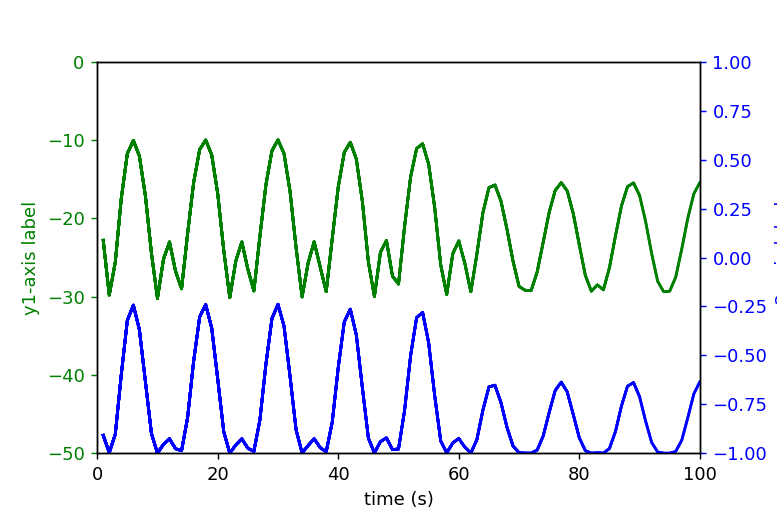

Episode =  330, total reward = -2161.685
Episode =  331, total reward = -1748.127
Episode =  332, total reward = -2346.323
Episode =  333, total reward = -2332.649
Episode =  334, total reward = -2346.893
Episode =  335, total reward = -1672.688
Episode =  336, total reward = -2280.398
Episode =  337, total reward = -2403.054
Episode =  338, total reward = -2341.922
Episode =  339, total reward = -2324.720
Episode =  340, total reward = -2223.685
Episode =  341, total reward = -2455.375
Episode =  342, total reward = -2370.667
Episode =  343, total reward = -2053.095
Episode =  344, total reward = -2448.466
Episode =  345, total reward = -2347.367
Episode =  346, total reward = -2181.555
Episode =  347, total reward = -2353.887
Episode =  348, total reward = -2035.658
Episode =  349, total reward = -1935.550
Episode =  350, total reward = -1942.536
Episode =  351, total reward = -2021.261
Episode =  352, total reward = -2361.247
Episode =  353, total reward = -2326.289
Episode =  354, 

<IPython.core.display.Javascript object>


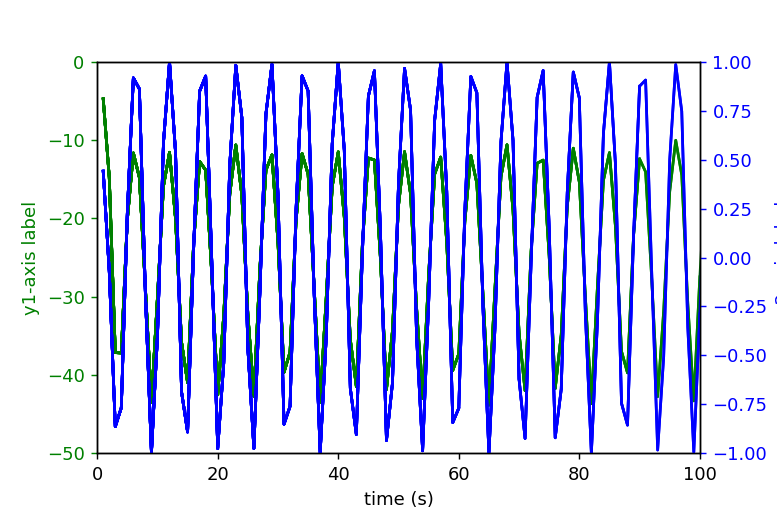

Episode =  360, total reward = -2489.371
Episode =  361, total reward = -2422.208
Episode =  362, total reward = -2119.393
Episode =  363, total reward = -1975.365
Episode =  364, total reward = -2354.970
Episode =  365, total reward = -2315.673
Episode =  366, total reward = -2329.243
Episode =  367, total reward = -2331.729
Episode =  368, total reward = -1992.651
Episode =  369, total reward = -2399.929
Episode =  370, total reward = -2463.279
Episode =  371, total reward = -2481.639
Episode =  372, total reward = -1941.626
Episode =  373, total reward = -2323.307
Episode =  374, total reward = -2336.324
Episode =  375, total reward = -2409.029
Episode =  376, total reward = -2099.362
Episode =  377, total reward = -2479.120
Episode =  378, total reward = -1917.810
Episode =  379, total reward = -2278.194
Episode =  380, total reward = -1799.039
Episode =  381, total reward = -1647.658
Episode =  382, total reward = -2122.745
Episode =  383, total reward = -2392.614
Episode =  384, 

<IPython.core.display.Javascript object>


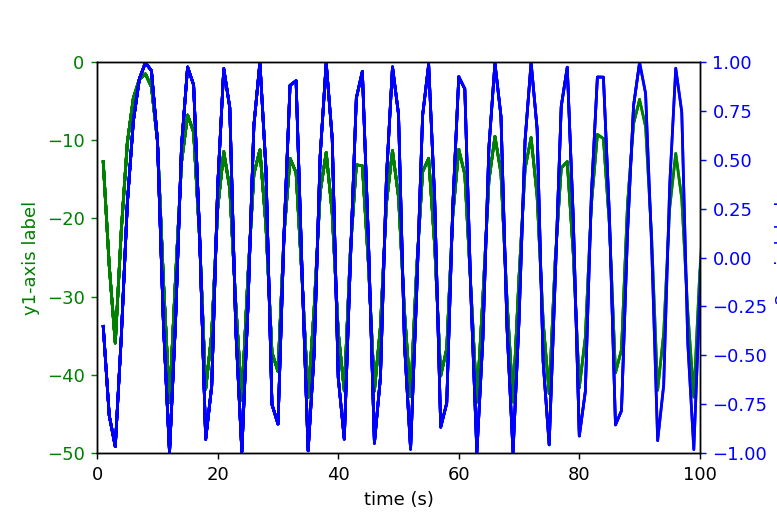

Episode =  390, total reward = -2322.633
Episode =  391, total reward = -2348.669
Episode =  392, total reward = -2352.303
Episode =  393, total reward = -2386.302
Episode =  394, total reward = -2336.087
Episode =  395, total reward = -2408.460
Episode =  396, total reward = -2360.402
Episode =  397, total reward = -2333.172
Episode =  398, total reward = -2348.426
Episode =  399, total reward = -2207.258
Episode =  400, total reward = -2300.946
Episode =  401, total reward = -2464.867
Episode =  402, total reward = -2479.486
Episode =  403, total reward = -2479.238
Episode =  404, total reward = -2402.148
Episode =  405, total reward = -1969.848
Episode =  406, total reward = -2405.273
Episode =  407, total reward = -1817.896
Episode =  408, total reward = -2371.301
Episode =  409, total reward = -2179.837
Episode =  410, total reward = -2423.192
Episode =  411, total reward = -2316.209
Episode =  412, total reward = -2418.833
Episode =  413, total reward = -2038.146
Episode =  414, 

<IPython.core.display.Javascript object>


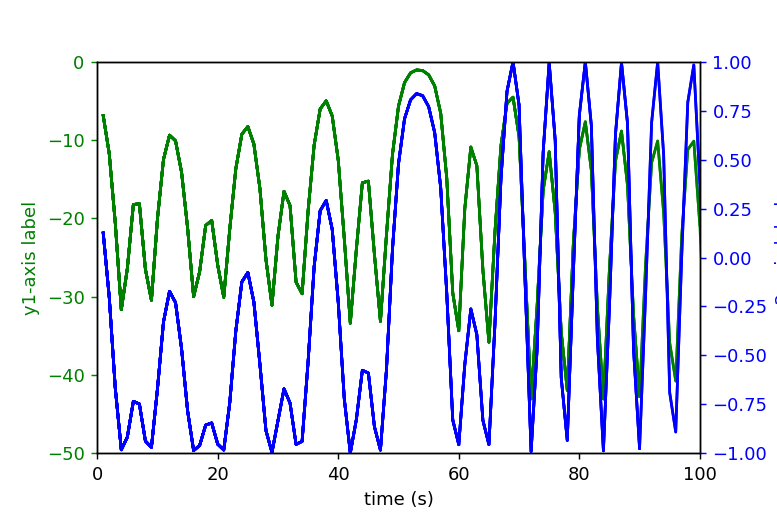

Episode =  420, total reward = -1944.892
Episode =  421, total reward = -2460.652
Episode =  422, total reward = -2194.249
Episode =  423, total reward = -1898.441
Episode =  424, total reward = -2341.884
Episode =  425, total reward = -2460.711
Episode =  426, total reward = -2413.076
Episode =  427, total reward = -1752.621
Episode =  428, total reward = -2300.187
Episode =  429, total reward = -1788.864
Episode =  430, total reward = -2355.919
Episode =  431, total reward = -1919.761
Episode =  432, total reward = -2020.857
Episode =  433, total reward = -2439.627
Episode =  434, total reward = -2321.329
Episode =  435, total reward = -2393.098
Episode =  436, total reward = -2145.706
Episode =  437, total reward = -2082.575
Episode =  438, total reward = -2025.188
Episode =  439, total reward = -2435.260
Episode =  440, total reward = -2123.931
Episode =  441, total reward = -2479.499
Episode =  442, total reward = -1833.394
Episode =  443, total reward = -2251.081
Episode =  444, 

<IPython.core.display.Javascript object>


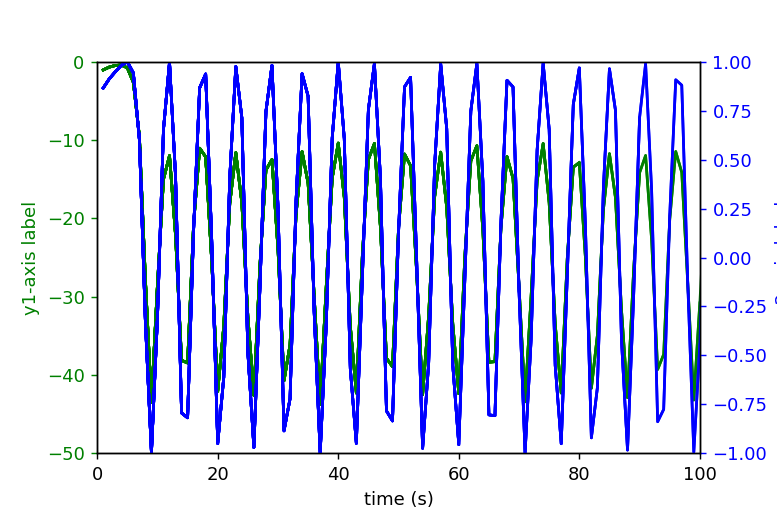

Episode =  450, total reward = -2355.615
Episode =  451, total reward = -2351.943
Episode =  452, total reward = -2401.773
Episode =  453, total reward = -2271.976
Episode =  454, total reward = -2021.997
Episode =  455, total reward = -2114.688
Episode =  456, total reward = -2272.699
Episode =  457, total reward = -2324.709
Episode =  458, total reward = -2018.619
Episode =  459, total reward = -1937.078
Episode =  460, total reward = -2036.349
Episode =  461, total reward = -1903.760
Episode =  462, total reward = -2001.800
Episode =  463, total reward = -2407.109
Episode =  464, total reward = -1953.004
Episode =  465, total reward = -2310.021
Episode =  466, total reward = -2108.367
Episode =  467, total reward = -2381.347
Episode =  468, total reward = -2171.656
Episode =  469, total reward = -2382.146
Episode =  470, total reward = -2416.490
Episode =  471, total reward = -1760.966
Episode =  472, total reward = -2284.628
Episode =  473, total reward = -2161.682
Episode =  474, 

<IPython.core.display.Javascript object>


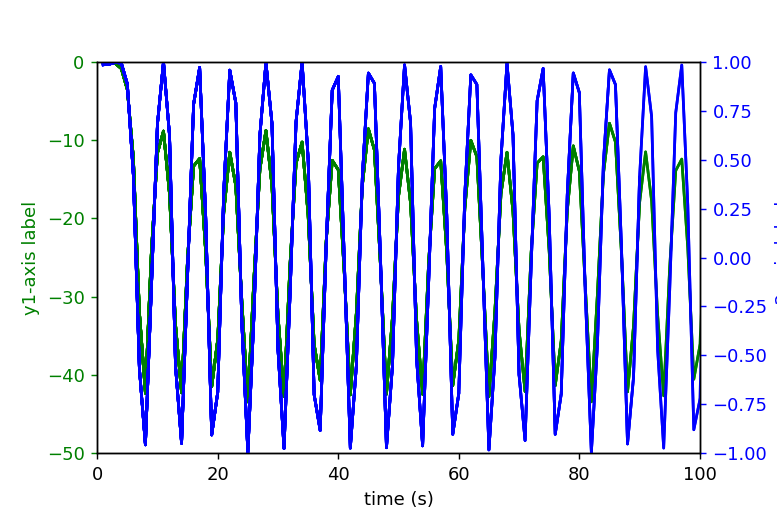

Episode =  480, total reward = -2341.664
Episode =  481, total reward = -2351.466
Episode =  482, total reward = -1794.770
Episode =  483, total reward = -2440.929
Episode =  484, total reward = -2349.293
Episode =  485, total reward = -2265.242
Episode =  486, total reward = -2384.540
Episode =  487, total reward = -2247.392
Episode =  488, total reward = -1790.413
Episode =  489, total reward = -2290.345
Episode =  490, total reward = -2491.777
Episode =  491, total reward = -2344.562
Episode =  492, total reward = -2303.101
Episode =  493, total reward = -2020.450
Episode =  494, total reward = -2265.282
Episode =  495, total reward = -1905.110
Episode =  496, total reward = -2461.324
Episode =  497, total reward = -2468.016
Episode =  498, total reward = -2282.183
Episode =  499, total reward = -2124.565
Episode =  500, total reward = -2328.381
Episode =  501, total reward = -2123.860
Episode =  502, total reward = -2372.617
Episode =  503, total reward = -2037.283
Episode =  504, 

<IPython.core.display.Javascript object>


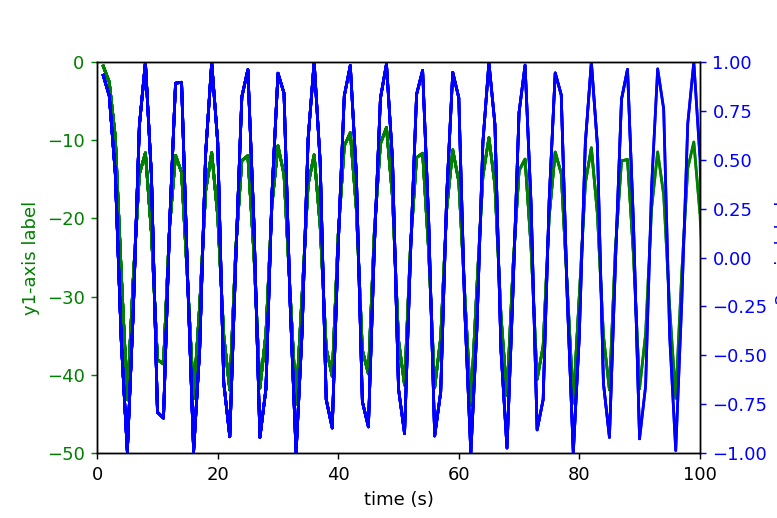

Episode =  510, total reward = -2414.514
Episode =  511, total reward = -2306.608
Episode =  512, total reward = -2434.174
Episode =  513, total reward = -2003.022
Episode =  514, total reward = -2349.471
Episode =  515, total reward = -2269.897
Episode =  516, total reward = -2382.248
Episode =  517, total reward = -2124.779
Episode =  518, total reward = -1740.940
Episode =  519, total reward = -2266.567
Episode =  520, total reward = -1781.509
Episode =  521, total reward = -2349.270
Episode =  522, total reward = -2399.223
Episode =  523, total reward = -2136.948
Episode =  524, total reward = -2064.935
Episode =  525, total reward = -1546.355
Episode =  526, total reward = -2398.517
Episode =  527, total reward = -1729.699
Episode =  528, total reward = -2359.257
Episode =  529, total reward = -2309.643
Episode =  530, total reward = -2293.825
Episode =  531, total reward = -2446.425
Episode =  532, total reward = -1664.251
Episode =  533, total reward = -2229.621
Episode =  534, 

<IPython.core.display.Javascript object>


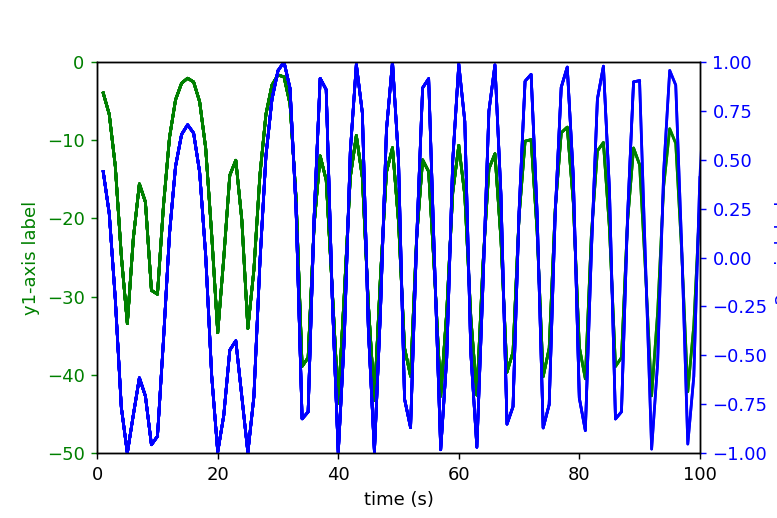

Episode =  540, total reward = -2127.352
Episode =  541, total reward = -1917.880
Episode =  542, total reward = -1802.713
Episode =  543, total reward = -2454.282
Episode =  544, total reward = -2327.851
Episode =  545, total reward = -2315.068
Episode =  546, total reward = -2395.663
Episode =  547, total reward = -2460.651
Episode =  548, total reward = -2086.664
Episode =  549, total reward = -2474.694
Episode =  550, total reward = -2376.630
Episode =  551, total reward = -2449.660
Episode =  552, total reward = -2455.582
Episode =  553, total reward = -1816.556
Episode =  554, total reward = -1790.396
Episode =  555, total reward = -2088.187
Episode =  556, total reward = -2165.386
Episode =  557, total reward = -1872.891
Episode =  558, total reward = -2392.519
Episode =  559, total reward = -2363.512
Episode =  560, total reward = -2427.949
Episode =  561, total reward = -2362.251
Episode =  562, total reward = -1784.001
Episode =  563, total reward = -2326.025
Episode =  564, 

<IPython.core.display.Javascript object>


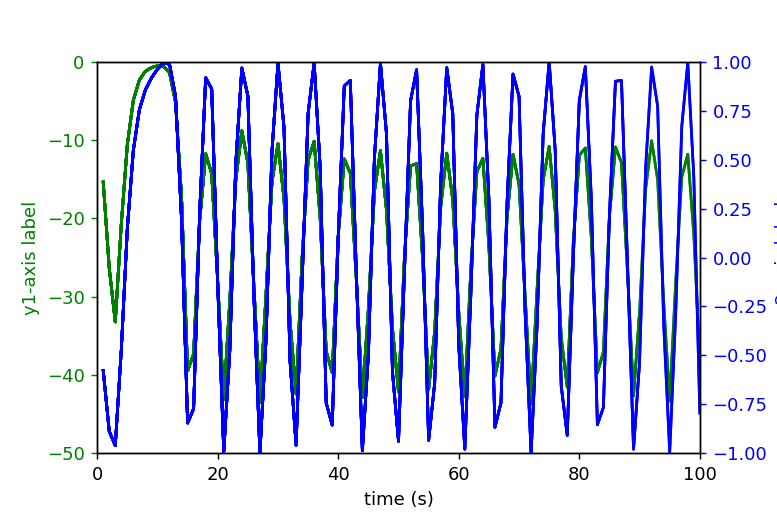

Episode =  570, total reward = -2301.496
Episode =  571, total reward = -2087.975
Episode =  572, total reward = -2268.004
Episode =  573, total reward = -2161.066
Episode =  574, total reward = -1824.820
Episode =  575, total reward = -2145.945
Episode =  576, total reward = -2188.617
Episode =  577, total reward = -2477.668
Episode =  578, total reward = -2428.970
Episode =  579, total reward = -1780.521
Episode =  580, total reward = -2404.405
Episode =  581, total reward = -2330.012
Episode =  582, total reward = -2438.065
Episode =  583, total reward = -1528.181
Episode =  584, total reward = -1645.844
Episode =  585, total reward = -2323.310
Episode =  586, total reward = -2017.831
Episode =  587, total reward = -2318.021
Episode =  588, total reward = -1653.301
Episode =  589, total reward = -2426.324
Episode =  590, total reward = -2203.983
Episode =  591, total reward = -1940.175
Episode =  592, total reward = -2426.274
Episode =  593, total reward = -2240.795
Episode =  594, 

<IPython.core.display.Javascript object>


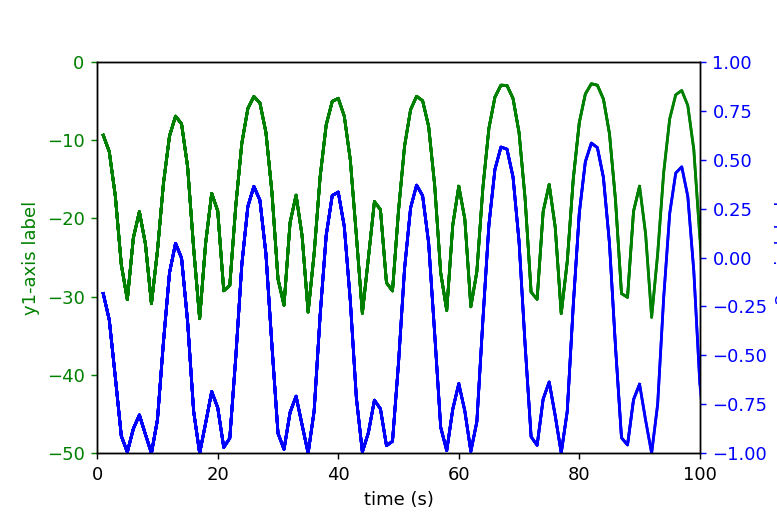

Episode =  600, total reward = -1735.796
Episode =  601, total reward = -1633.580
Episode =  602, total reward = -2350.518
Episode =  603, total reward = -2290.479
Episode =  604, total reward = -2115.332
Episode =  605, total reward = -2315.915
Episode =  606, total reward = -2479.479
Episode =  607, total reward = -1897.087
Episode =  608, total reward = -1888.516
Episode =  609, total reward = -1738.473
Episode =  610, total reward = -2216.336
Episode =  611, total reward = -2307.878
Episode =  612, total reward = -2174.191
Episode =  613, total reward = -2108.301
Episode =  614, total reward = -2467.982
Episode =  615, total reward = -2373.543
Episode =  616, total reward = -1777.735
Episode =  617, total reward = -2008.861
Episode =  618, total reward = -1630.254
Episode =  619, total reward = -2387.565
Episode =  620, total reward = -2461.064
Episode =  621, total reward = -2471.835
Episode =  622, total reward = -2376.348
Episode =  623, total reward = -1907.558
Episode =  624, 

/Users/ericness/anaconda3/envs/quadcopter/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


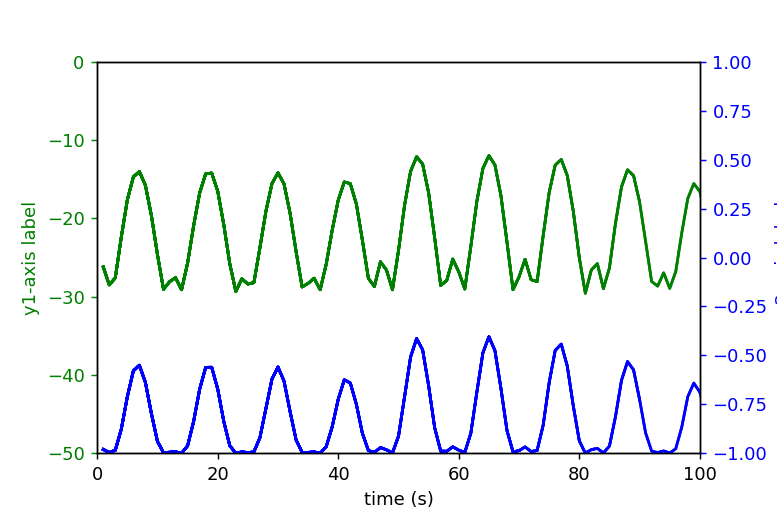

Episode =  630, total reward = -2227.501
Episode =  631, total reward = -1901.635
Episode =  632, total reward = -1947.511
Episode =  633, total reward = -2121.528
Episode =  634, total reward = -2390.082
Episode =  635, total reward = -2399.715
Episode =  636, total reward = -2338.825
Episode =  637, total reward = -2371.476
Episode =  638, total reward = -2180.045
Episode =  639, total reward = -1916.504
Episode =  640, total reward = -2453.098
Episode =  641, total reward = -1596.238
Episode =  642, total reward = -2308.319
Episode =  643, total reward = -2470.968
Episode =  644, total reward = -2385.734
Episode =  645, total reward = -2313.044
Episode =  646, total reward = -2367.473
Episode =  647, total reward = -2477.656
Episode =  648, total reward = -1794.565
Episode =  649, total reward = -1741.568
Episode =  650, total reward = -2345.891
Episode =  651, total reward = -2457.473
Episode =  652, total reward = -2118.306
Episode =  653, total reward = -1540.977
Episode =  654, 

<IPython.core.display.Javascript object>


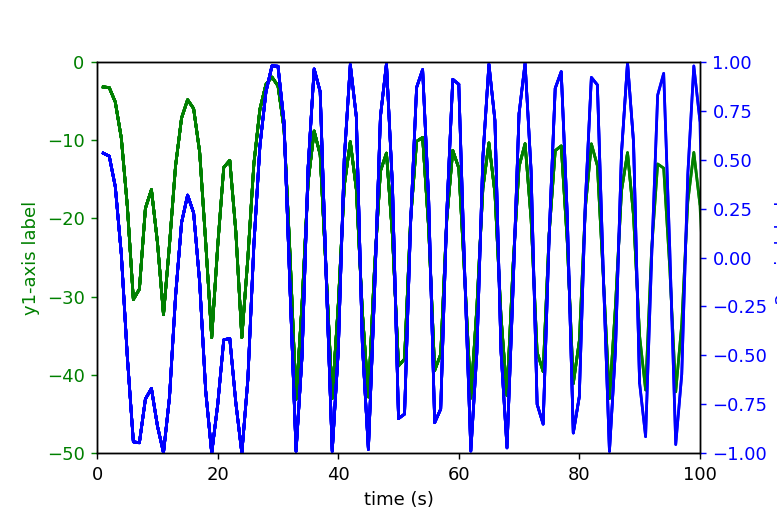

Episode =  660, total reward = -2181.480
Episode =  661, total reward = -1811.583
Episode =  662, total reward = -2047.954
Episode =  663, total reward = -1779.295
Episode =  664, total reward = -2469.355
Episode =  665, total reward = -2280.860
Episode =  666, total reward = -2065.684
Episode =  667, total reward = -2473.023
Episode =  668, total reward = -2373.449
Episode =  669, total reward = -2352.011
Episode =  670, total reward = -2366.223
Episode =  671, total reward = -1763.248
Episode =  672, total reward = -2323.859
Episode =  673, total reward = -2107.448
Episode =  674, total reward = -1878.237
Episode =  675, total reward = -2309.472
Episode =  676, total reward = -2246.410
Episode =  677, total reward = -2251.786
Episode =  678, total reward = -2290.764
Episode =  679, total reward = -2308.359
Episode =  680, total reward = -1945.955
Episode =  681, total reward = -2380.112
Episode =  682, total reward = -2414.705
Episode =  683, total reward = -1887.377
Episode =  684, 

<IPython.core.display.Javascript object>


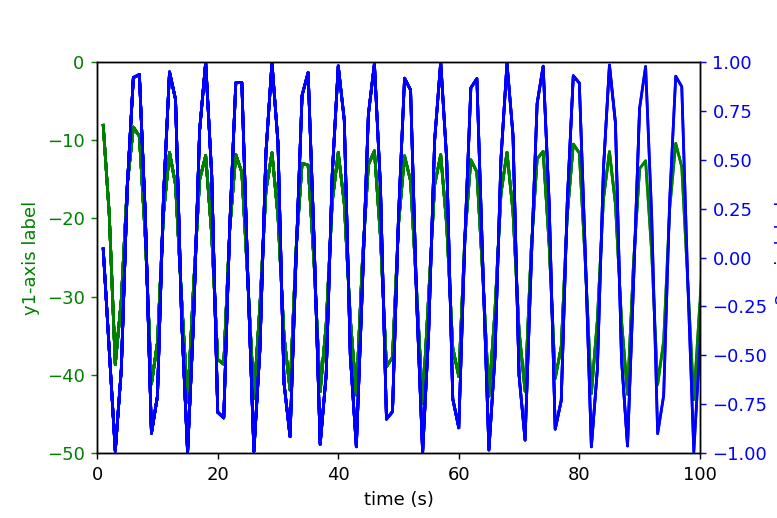

Episode =  690, total reward = -2482.034
Episode =  691, total reward = -2362.551
Episode =  692, total reward = -2481.820
Episode =  693, total reward = -2074.424
Episode =  694, total reward = -2348.134
Episode =  695, total reward = -2192.092
Episode =  696, total reward = -1932.930
Episode =  697, total reward = -2252.694
Episode =  698, total reward = -2146.367
Episode =  699, total reward = -1853.406
Episode =  700, total reward = -1899.097
Episode =  701, total reward = -2303.446
Episode =  702, total reward = -2445.977
Episode =  703, total reward = -1788.172
Episode =  704, total reward = -2195.093
Episode =  705, total reward = -2473.058
Episode =  706, total reward = -2141.145
Episode =  707, total reward = -2378.624
Episode =  708, total reward = -2085.395
Episode =  709, total reward = -2376.698
Episode =  710, total reward = -2323.654
Episode =  711, total reward = -2401.538
Episode =  712, total reward = -1929.050
Episode =  713, total reward = -2448.353
Episode =  714, 

<IPython.core.display.Javascript object>


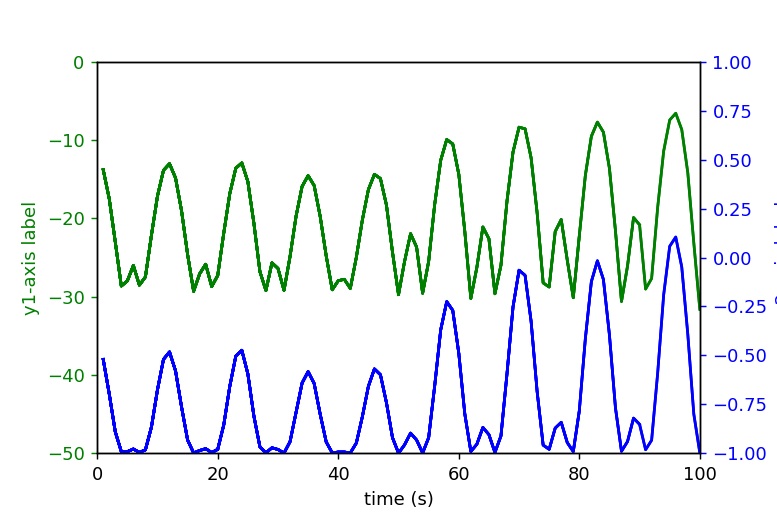

Episode =  720, total reward = -2106.459
Episode =  721, total reward = -2446.366
Episode =  722, total reward = -2354.525
Episode =  723, total reward = -2292.178
Episode =  724, total reward = -2172.930
Episode =  725, total reward = -1891.879
Episode =  726, total reward = -2290.227
Episode =  727, total reward = -1929.969
Episode =  728, total reward = -2282.456
Episode =  729, total reward = -2357.582
Episode =  730, total reward = -1679.153
Episode =  731, total reward = -2324.703
Episode =  732, total reward = -2262.006
Episode =  733, total reward = -2380.184
Episode =  734, total reward = -2469.169
Episode =  735, total reward = -2407.699
Episode =  736, total reward = -2206.351
Episode =  737, total reward = -2169.414
Episode =  738, total reward = -2399.294
Episode =  739, total reward = -2365.896
Episode =  740, total reward = -2406.283
Episode =  741, total reward = -2311.670
Episode =  742, total reward = -1853.552
Episode =  743, total reward = -1877.799
Episode =  744, 

<IPython.core.display.Javascript object>


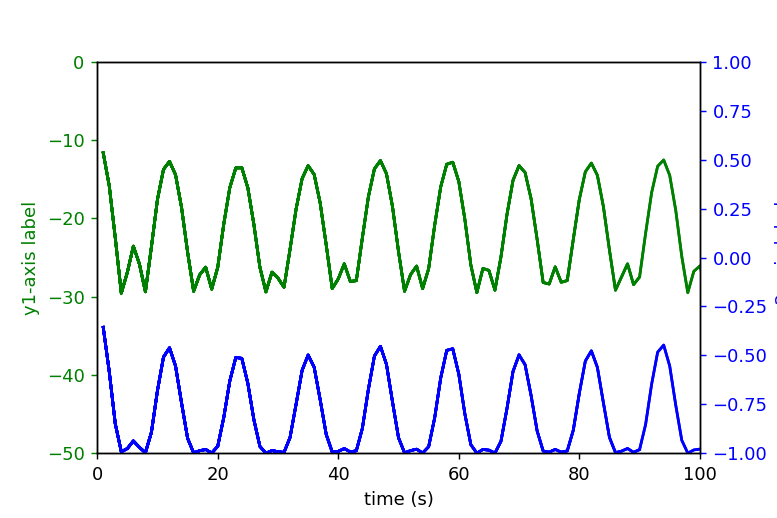

Episode =  750, total reward = -2213.312
Episode =  751, total reward = -2289.915
Episode =  752, total reward = -2357.213
Episode =  753, total reward = -1971.182
Episode =  754, total reward = -2373.074
Episode =  755, total reward = -2391.159
Episode =  756, total reward = -2361.509
Episode =  757, total reward = -2392.969
Episode =  758, total reward = -2395.571
Episode =  759, total reward = -2476.710
Episode =  760, total reward = -2315.609
Episode =  761, total reward = -2179.543
Episode =  762, total reward = -2388.059
Episode =  763, total reward = -1842.140
Episode =  764, total reward = -2287.172
Episode =  765, total reward = -2434.957
Episode =  766, total reward = -2388.174
Episode =  767, total reward = -2468.758
Episode =  768, total reward = -2417.529
Episode =  769, total reward = -2436.842
Episode =  770, total reward = -2166.843
Episode =  771, total reward = -1678.288
Episode =  772, total reward = -2414.183
Episode =  773, total reward = -2455.476
Episode =  774, 

<IPython.core.display.Javascript object>


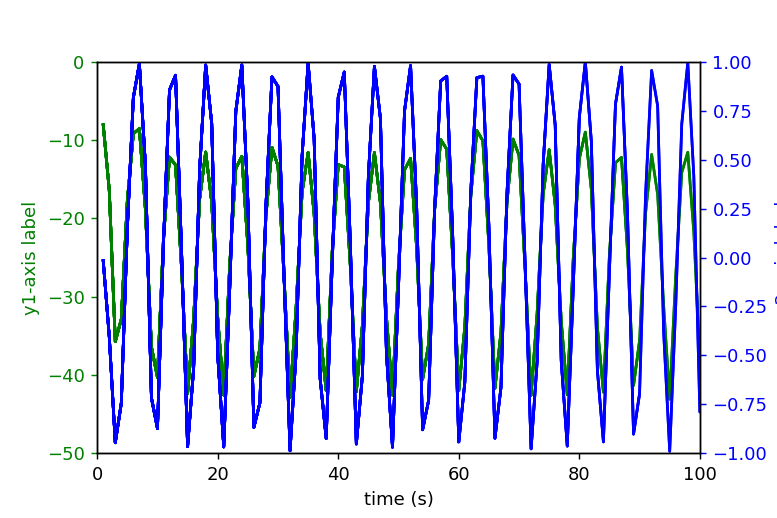

Episode =  780, total reward = -2449.012
Episode =  781, total reward = -2309.353
Episode =  782, total reward = -2290.370
Episode =  783, total reward = -2104.750
Episode =  784, total reward = -2339.056
Episode =  785, total reward = -2463.200
Episode =  786, total reward = -2282.771
Episode =  787, total reward = -2440.930
Episode =  788, total reward = -2356.919
Episode =  789, total reward = -2416.596
Episode =  790, total reward = -2175.201
Episode =  791, total reward = -2391.041
Episode =  792, total reward = -2453.369
Episode =  793, total reward = -2294.236
Episode =  794, total reward = -1974.440
Episode =  795, total reward = -2354.898
Episode =  796, total reward = -1970.279
Episode =  797, total reward = -2350.051
Episode =  798, total reward = -2250.633
Episode =  799, total reward = -1538.447
Episode =  800, total reward = -2044.126
Episode =  801, total reward = -2484.542
Episode =  802, total reward = -2453.547
Episode =  803, total reward = -2389.007
Episode =  804, 

<IPython.core.display.Javascript object>


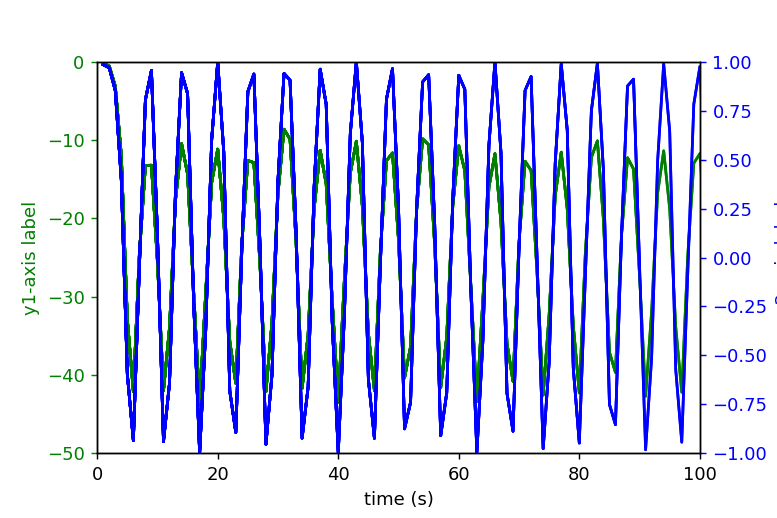

Episode =  810, total reward = -2386.279
Episode =  811, total reward = -2306.906
Episode =  812, total reward = -2411.581
Episode =  813, total reward = -1962.671
Episode =  814, total reward = -1963.161
Episode =  815, total reward = -1712.764
Episode =  816, total reward = -2201.040
Episode =  817, total reward = -2191.662
Episode =  818, total reward = -1978.618
Episode =  819, total reward = -2030.923
Episode =  820, total reward = -1808.973
Episode =  821, total reward = -1877.844
Episode =  822, total reward = -1645.445
Episode =  823, total reward = -2070.508
Episode =  824, total reward = -2380.468
Episode =  825, total reward = -1961.052
Episode =  826, total reward = -2355.900
Episode =  827, total reward = -2054.867
Episode =  828, total reward = -2069.060
Episode =  829, total reward = -2447.473
Episode =  830, total reward = -2363.627
Episode =  831, total reward = -2135.159
Episode =  832, total reward = -1860.123
Episode =  833, total reward = -1754.989
Episode =  834, 

<IPython.core.display.Javascript object>


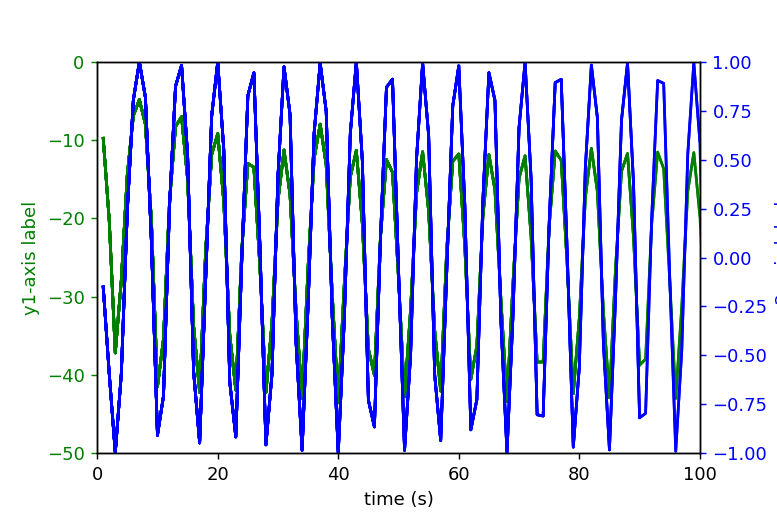

Episode =  840, total reward = -2396.558
Episode =  841, total reward = -2434.959
Episode =  842, total reward = -1821.044
Episode =  843, total reward = -1897.453
Episode =  844, total reward = -2482.994
Episode =  845, total reward = -2385.513
Episode =  846, total reward = -2451.895
Episode =  847, total reward = -2369.439
Episode =  848, total reward = -2314.520
Episode =  849, total reward = -1903.103
Episode =  850, total reward = -2309.228
Episode =  851, total reward = -2389.678
Episode =  852, total reward = -2468.265
Episode =  853, total reward = -2450.459
Episode =  854, total reward = -2242.011
Episode =  855, total reward = -2306.717
Episode =  856, total reward = -2424.937
Episode =  857, total reward = -2404.603
Episode =  858, total reward = -2170.940
Episode =  859, total reward = -2344.285
Episode =  860, total reward = -2116.675
Episode =  861, total reward = -2469.939
Episode =  862, total reward = -2397.639
Episode =  863, total reward = -1884.369
Episode =  864, 

<IPython.core.display.Javascript object>


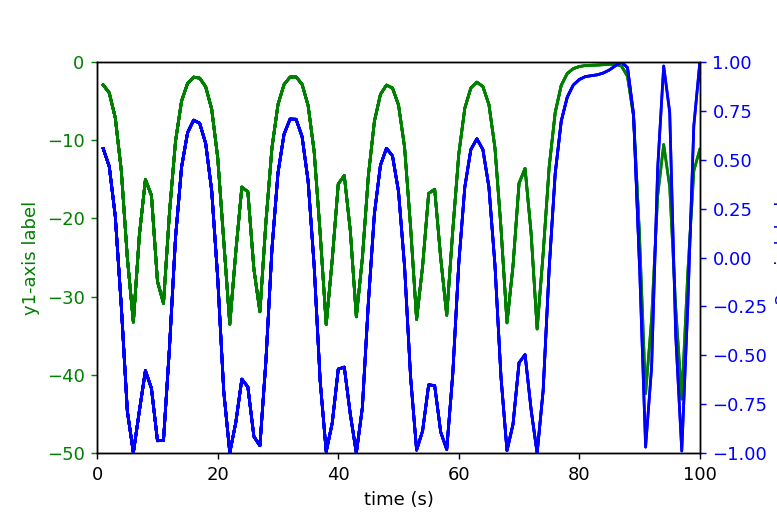

Episode =  870, total reward = -1488.576
Episode =  871, total reward = -1907.647
Episode =  872, total reward = -2320.531
Episode =  873, total reward = -2465.596
Episode =  874, total reward = -2228.371
Episode =  875, total reward = -2351.738
Episode =  876, total reward = -2371.410
Episode =  877, total reward = -2322.483
Episode =  878, total reward = -2375.014
Episode =  879, total reward = -1912.804
Episode =  880, total reward = -2317.094
Episode =  881, total reward = -2264.375
Episode =  882, total reward = -2239.408
Episode =  883, total reward = -2385.301
Episode =  884, total reward = -2096.323
Episode =  885, total reward = -2358.075
Episode =  886, total reward = -1878.117
Episode =  887, total reward = -1801.518
Episode =  888, total reward = -2436.150
Episode =  889, total reward = -2105.366
Episode =  890, total reward = -2421.126
Episode =  891, total reward = -1907.028
Episode =  892, total reward = -1876.947
Episode =  893, total reward = -2330.682
Episode =  894, 

<IPython.core.display.Javascript object>


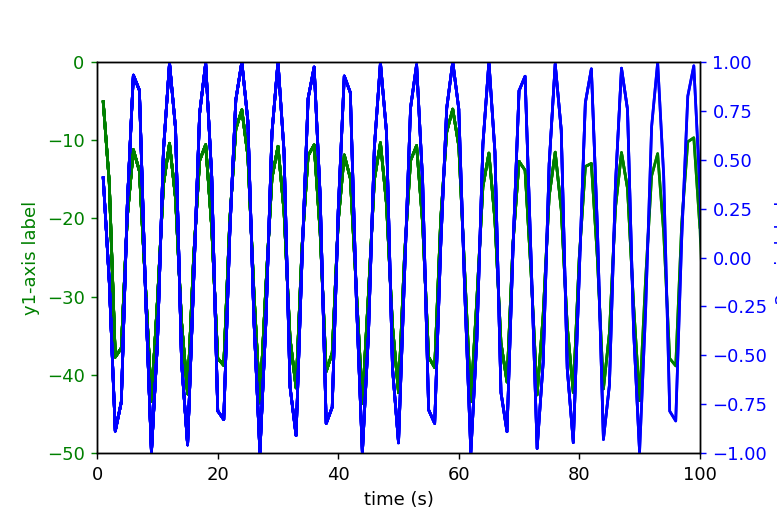

Episode =  900, total reward = -2409.771
Episode =  901, total reward = -2361.929
Episode =  902, total reward = -2313.475
Episode =  903, total reward = -2342.777
Episode =  904, total reward = -1749.651
Episode =  905, total reward = -1710.863
Episode =  906, total reward = -2102.983
Episode =  907, total reward = -2295.340
Episode =  908, total reward = -1829.354
Episode =  909, total reward = -1561.933
Episode =  910, total reward = -2403.058
Episode =  911, total reward = -2212.492
Episode =  912, total reward = -2295.611
Episode =  913, total reward = -1756.223
Episode =  914, total reward = -2373.740
Episode =  915, total reward = -2329.256
Episode =  916, total reward = -2392.788
Episode =  917, total reward = -1669.747
Episode =  918, total reward = -1912.410
Episode =  919, total reward = -1994.218
Episode =  920, total reward = -2273.154
Episode =  921, total reward = -2346.162
Episode =  922, total reward = -2177.608
Episode =  923, total reward = -2006.503
Episode =  924, 

<IPython.core.display.Javascript object>


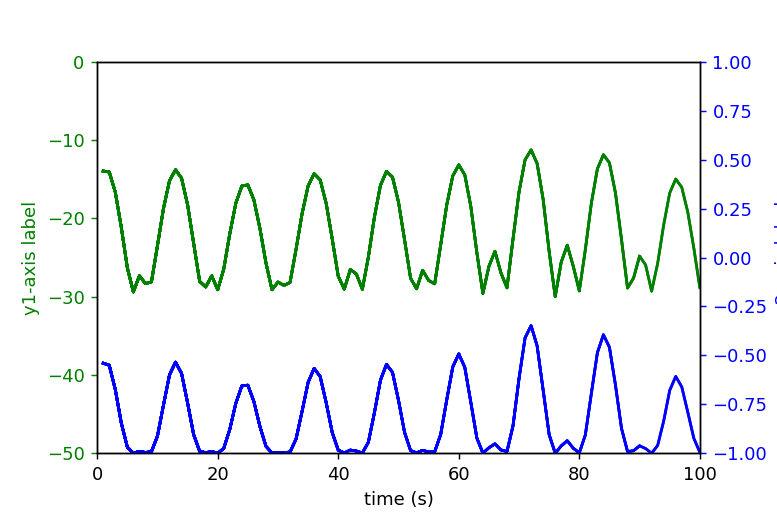

Episode =  930, total reward = -2226.107
Episode =  931, total reward = -2376.552
Episode =  932, total reward = -2128.591
Episode =  933, total reward = -2247.091
Episode =  934, total reward = -2405.297
Episode =  935, total reward = -2055.083
Episode =  936, total reward = -2409.247
Episode =  937, total reward = -2411.444
Episode =  938, total reward = -1964.093
Episode =  939, total reward = -1752.077
Episode =  940, total reward = -2002.436
Episode =  941, total reward = -2386.427
Episode =  942, total reward = -2306.991
Episode =  943, total reward = -2466.754
Episode =  944, total reward = -1788.174
Episode =  945, total reward = -2149.960
Episode =  946, total reward = -1860.760
Episode =  947, total reward = -2271.663
Episode =  948, total reward = -2145.290
Episode =  949, total reward = -2352.687
Episode =  950, total reward = -1940.352
Episode =  951, total reward = -2353.713
Episode =  952, total reward = -2447.101
Episode =  953, total reward = -1716.335
Episode =  954, 

<IPython.core.display.Javascript object>


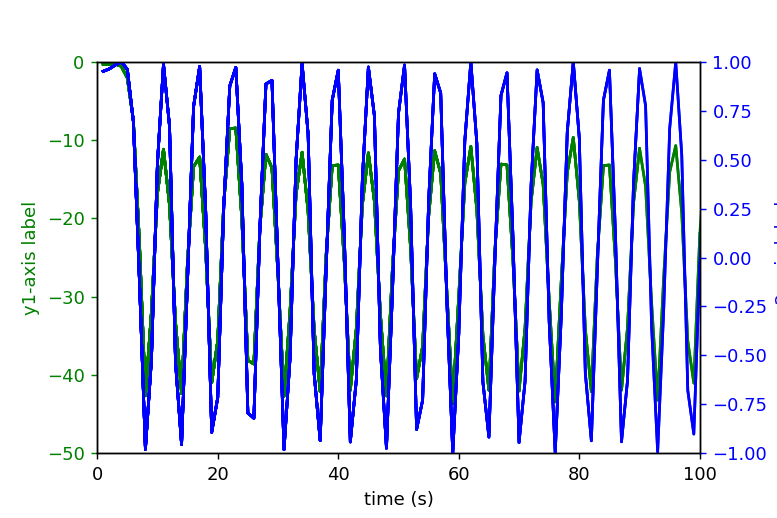

Episode =  960, total reward = -2353.334
Episode =  961, total reward = -1994.709
Episode =  962, total reward = -2271.795
Episode =  963, total reward = -2310.489
Episode =  964, total reward = -1735.779
Episode =  965, total reward = -2125.089
Episode =  966, total reward = -2352.014
Episode =  967, total reward = -2232.936
Episode =  968, total reward = -2476.780
Episode =  969, total reward = -1992.752
Episode =  970, total reward = -2313.916
Episode =  971, total reward = -2165.118
Episode =  972, total reward = -2369.446
Episode =  973, total reward = -2379.588
Episode =  974, total reward = -2308.595
Episode =  975, total reward = -2464.288
Episode =  976, total reward = -1834.799
Episode =  977, total reward = -2017.441
Episode =  978, total reward = -2103.190
Episode =  979, total reward = -2462.920
Episode =  980, total reward = -2391.898
Episode =  981, total reward = -2373.779
Episode =  982, total reward = -2428.848
Episode =  983, total reward = -2117.653
Episode =  984, 

<IPython.core.display.Javascript object>


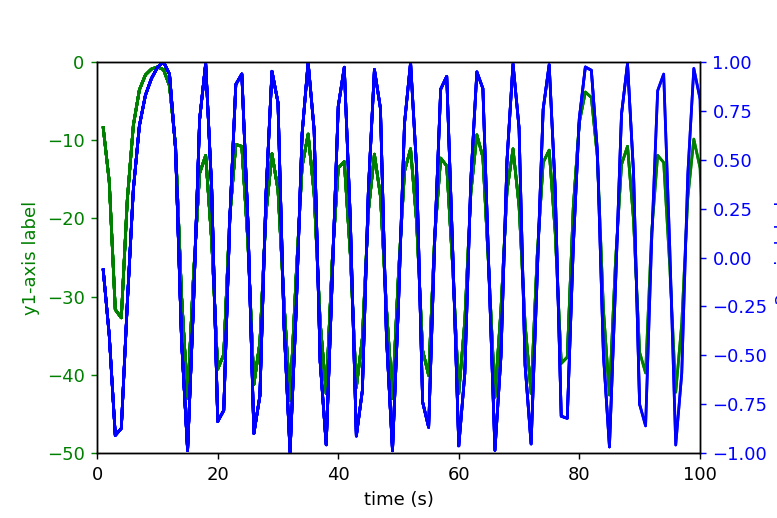

Episode =  990, total reward = -2235.787
Episode =  991, total reward = -1794.284
Episode =  992, total reward = -2077.403
Episode =  993, total reward = -2176.156
Episode =  994, total reward = -2299.170
Episode =  995, total reward = -2392.607
Episode =  996, total reward = -2216.332
Episode =  997, total reward = -2342.157
Episode =  998, total reward = -2414.748
Episode =  999, total reward = -2312.785
Episode = 1000, total reward = -2479.512


In [21]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

# pendulum plot values
time_limit = 100
y1_lower = -50
y1_upper = 0
y2_lower = -1
y2_upper = 1

num_episodes = 1000
task = PendulumTask()
agent = DDPG(task) 

pendulum_rewards = []

display_freq = 30
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init(time_limit, y1_lower, y1_upper, y2_lower, y2_upper)

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
            pendulum_rewards.append(total_reward)
            if display_graph:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            break


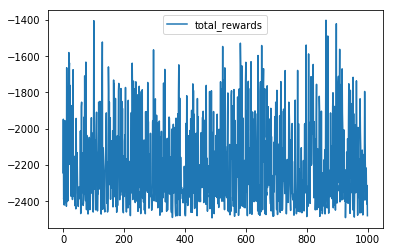

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(pendulum_rewards)),  pendulum_rewards, label='total_rewards')
plt.legend()
_ = plt.ylim()

## Train Agent on Quadcopter Task

Using TensorFlow backend.


Episode =    1, total reward = -8478.482
Episode =    2, total reward = -7781.759
Episode =    3, total reward = -7638.673
Episode =    4, total reward = -7783.691
Episode =    5, total reward = -7641.021
Episode =    6, total reward = -7639.106
Episode =    7, total reward = -7786.288
Episode =    8, total reward = -7638.940
Episode =    9, total reward = -7635.696
Episode =   10, total reward = -7638.703
Episode =   11, total reward = -7637.754
Episode =   12, total reward = -7635.221
Episode =   13, total reward = -7785.471
Episode =   14, total reward = -7638.868
Episode =   15, total reward = -7785.024
Episode =   16, total reward = -7777.986
Episode =   17, total reward = -7781.792
Episode =   18, total reward = -7784.621
Episode =   19, total reward = -7782.793


<IPython.core.display.Javascript object>


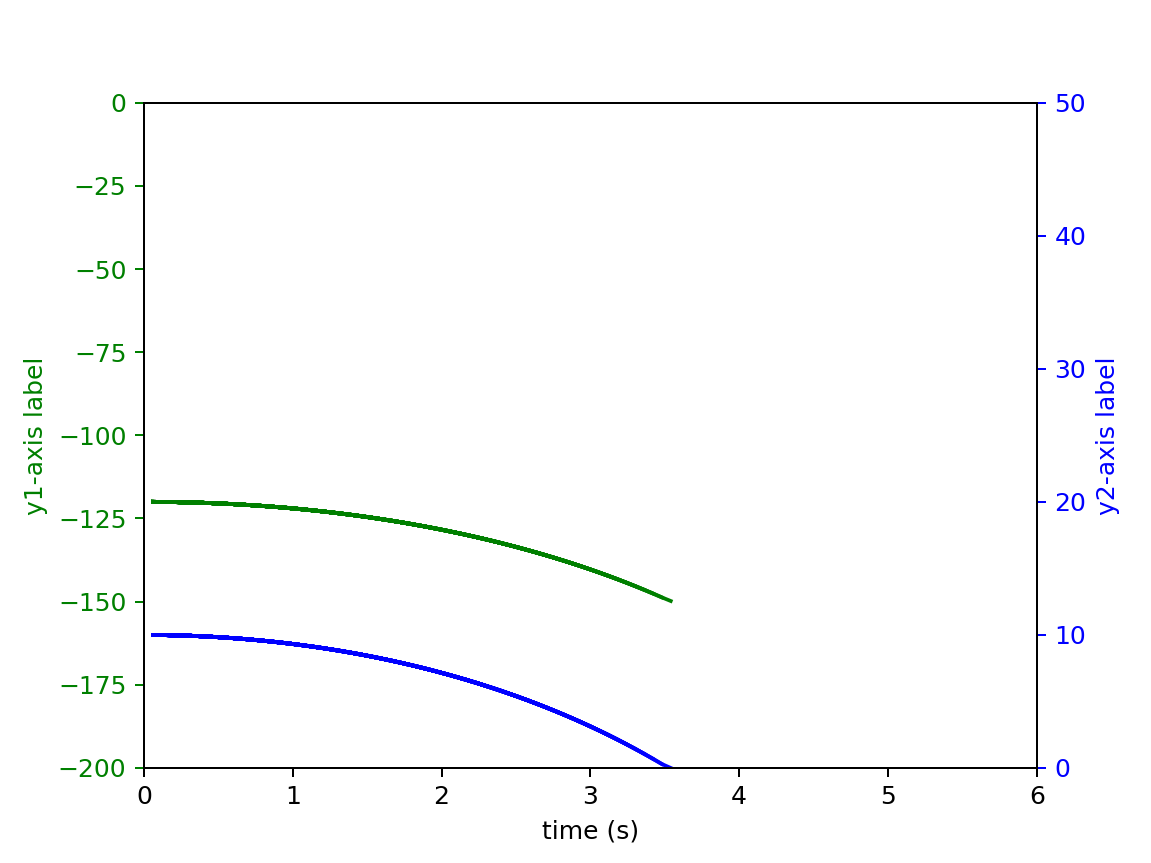

Episode =   20, total reward = -7639.487
Episode =   21, total reward = -7777.075
Episode =   22, total reward = -7637.163
Episode =   23, total reward = -7637.177
Episode =   24, total reward = -7639.134
Episode =   25, total reward = -7781.490
Episode =   26, total reward = -7639.262
Episode =   27, total reward = -7778.743
Episode =   28, total reward = -7778.435
Episode =   29, total reward = -7781.613
Episode =   30, total reward = -7635.444
Episode =   31, total reward = -7637.396
Episode =   32, total reward = -7642.410
Episode =   33, total reward = -7641.288
Episode =   34, total reward = -7782.925
Episode =   35, total reward = -7785.754
Episode =   36, total reward = -7779.334
Episode =   37, total reward = -7781.513
Episode =   38, total reward = -7637.744
Episode =   39, total reward = -7635.557


<IPython.core.display.Javascript object>


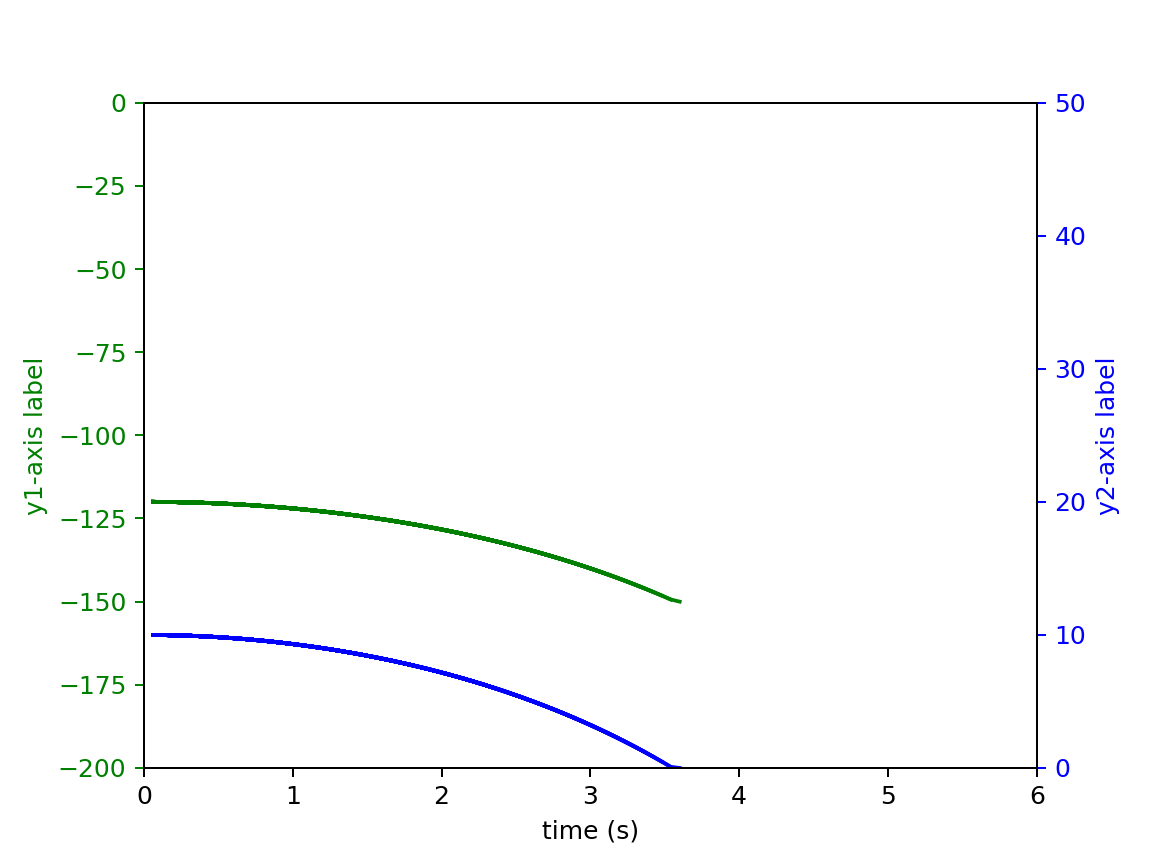

Episode =   40, total reward = -7782.522
Episode =   41, total reward = -7781.925
Episode =   42, total reward = -7778.913
Episode =   43, total reward = -7780.931
Episode =   44, total reward = -7775.563
Episode =   45, total reward = -7782.912
Episode =   46, total reward = -7780.035
Episode =   47, total reward = -7781.512
Episode =   48, total reward = -7778.190
Episode =   49, total reward = -7638.659
Episode =   50, total reward = -7645.066
Episode =   51, total reward = -7637.712
Episode =   52, total reward = -7782.621
Episode =   53, total reward = -7639.573
Episode =   54, total reward = -7634.336
Episode =   55, total reward = -7639.589
Episode =   56, total reward = -7637.443
Episode =   57, total reward = -7782.792
Episode =   58, total reward = -7637.427
Episode =   59, total reward = -7636.475


<IPython.core.display.Javascript object>


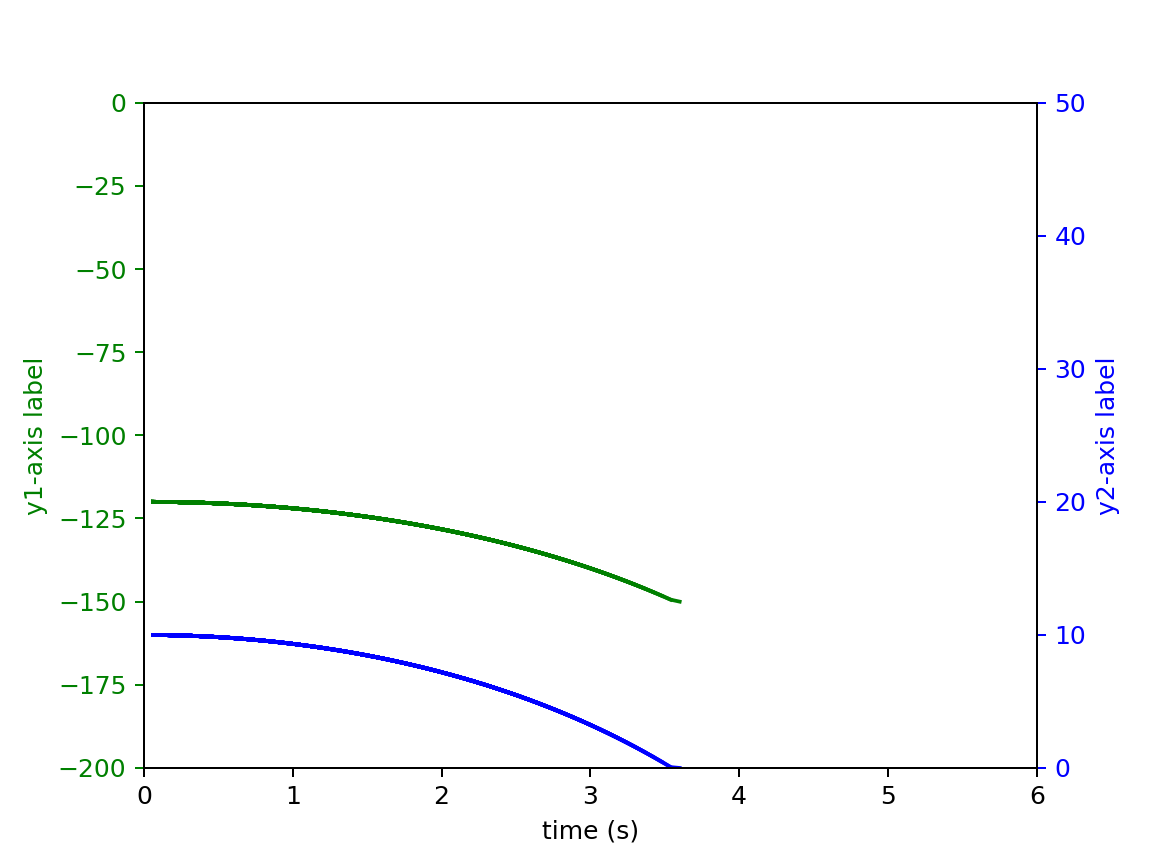

Episode =   60, total reward = -7780.439
Episode =   61, total reward = -7783.243
Episode =   62, total reward = -7779.005
Episode =   63, total reward = -7641.950
Episode =   64, total reward = -7780.157
Episode =   65, total reward = -7638.126
Episode =   66, total reward = -7783.312
Episode =   67, total reward = -7779.381
Episode =   68, total reward = -7783.475
Episode =   69, total reward = -7780.753
Episode =   70, total reward = -7638.163
Episode =   71, total reward = -7781.428
Episode =   72, total reward = -7783.311
Episode =   73, total reward = -7780.903
Episode =   74, total reward = -7782.199
Episode =   75, total reward = -7638.549
Episode =   76, total reward = -7637.823
Episode =   77, total reward = -7778.891
Episode =   78, total reward = -7783.705
Episode =   79, total reward = -7640.111


<IPython.core.display.Javascript object>


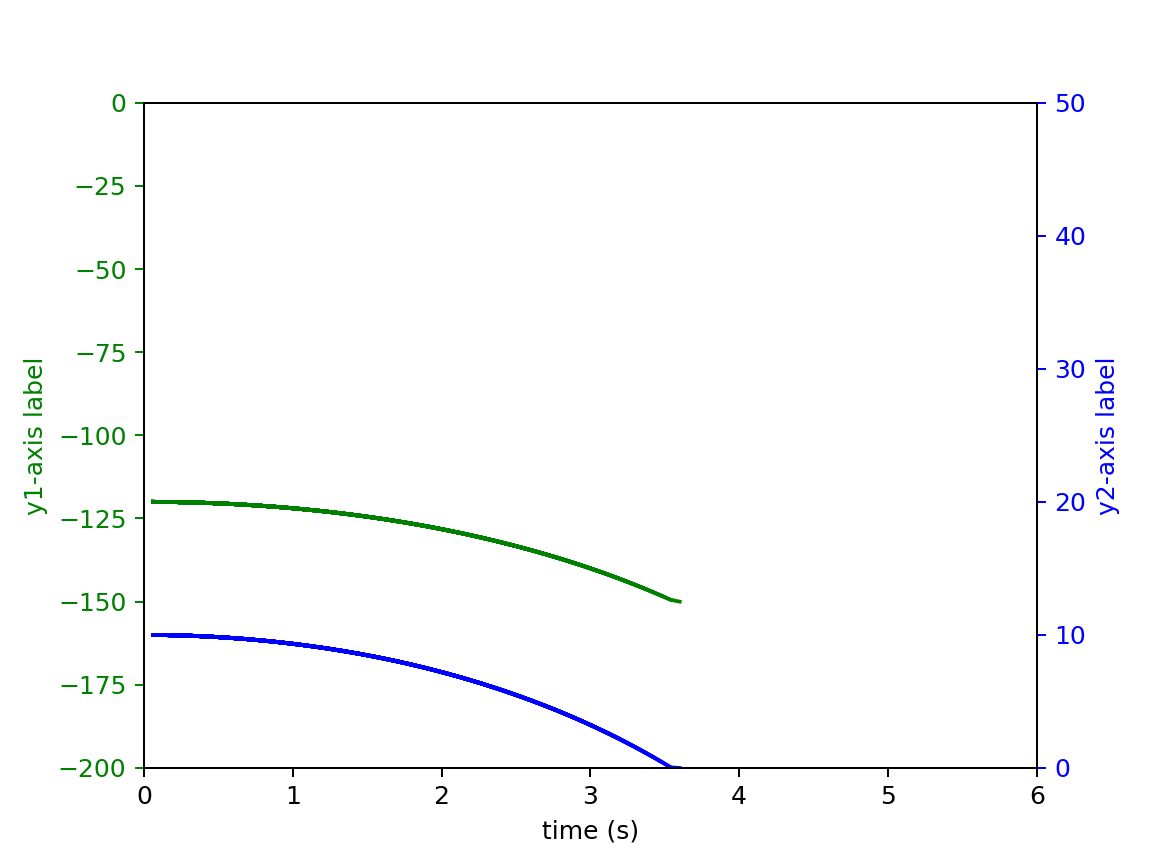

Episode =   80, total reward = -7779.925
Episode =   81, total reward = -7643.401
Episode =   82, total reward = -7645.810
Episode =   83, total reward = -7775.209
Episode =   84, total reward = -7785.029
Episode =   85, total reward = -7784.059
Episode =   86, total reward = -7638.973
Episode =   87, total reward = -7778.851
Episode =   88, total reward = -7785.915
Episode =   89, total reward = -7784.161
Episode =   90, total reward = -7642.199
Episode =   91, total reward = -7643.847
Episode =   92, total reward = -7640.972
Episode =   93, total reward = -7641.525
Episode =   94, total reward = -7781.322
Episode =   95, total reward = -7639.607
Episode =   96, total reward = -7778.916
Episode =   97, total reward = -7638.971
Episode =   98, total reward = -7639.975
Episode =   99, total reward = -7784.708


<IPython.core.display.Javascript object>


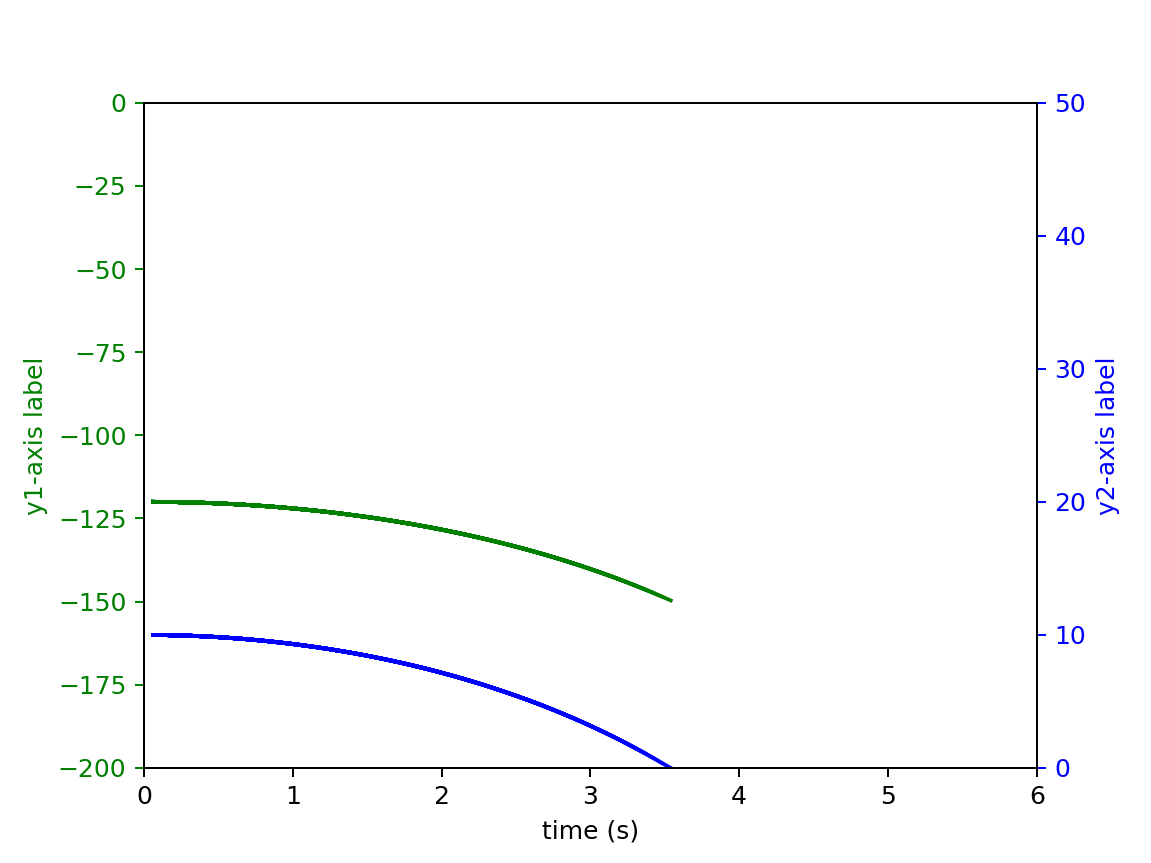

Episode =  100, total reward = -7636.504
Episode =  101, total reward = -7781.138
Episode =  102, total reward = -7784.020
Episode =  103, total reward = -7782.863
Episode =  104, total reward = -7640.673
Episode =  105, total reward = -7637.062
Episode =  106, total reward = -7780.797
Episode =  107, total reward = -7636.198
Episode =  108, total reward = -7774.242
Episode =  109, total reward = -7637.110
Episode =  110, total reward = -7635.999
Episode =  111, total reward = -7783.763
Episode =  112, total reward = -7639.488
Episode =  113, total reward = -7782.174
Episode =  114, total reward = -7776.651
Episode =  115, total reward = -7780.315
Episode =  116, total reward = -7637.593
Episode =  117, total reward = -7784.440
Episode =  118, total reward = -7635.771
Episode =  119, total reward = -7640.073


<IPython.core.display.Javascript object>


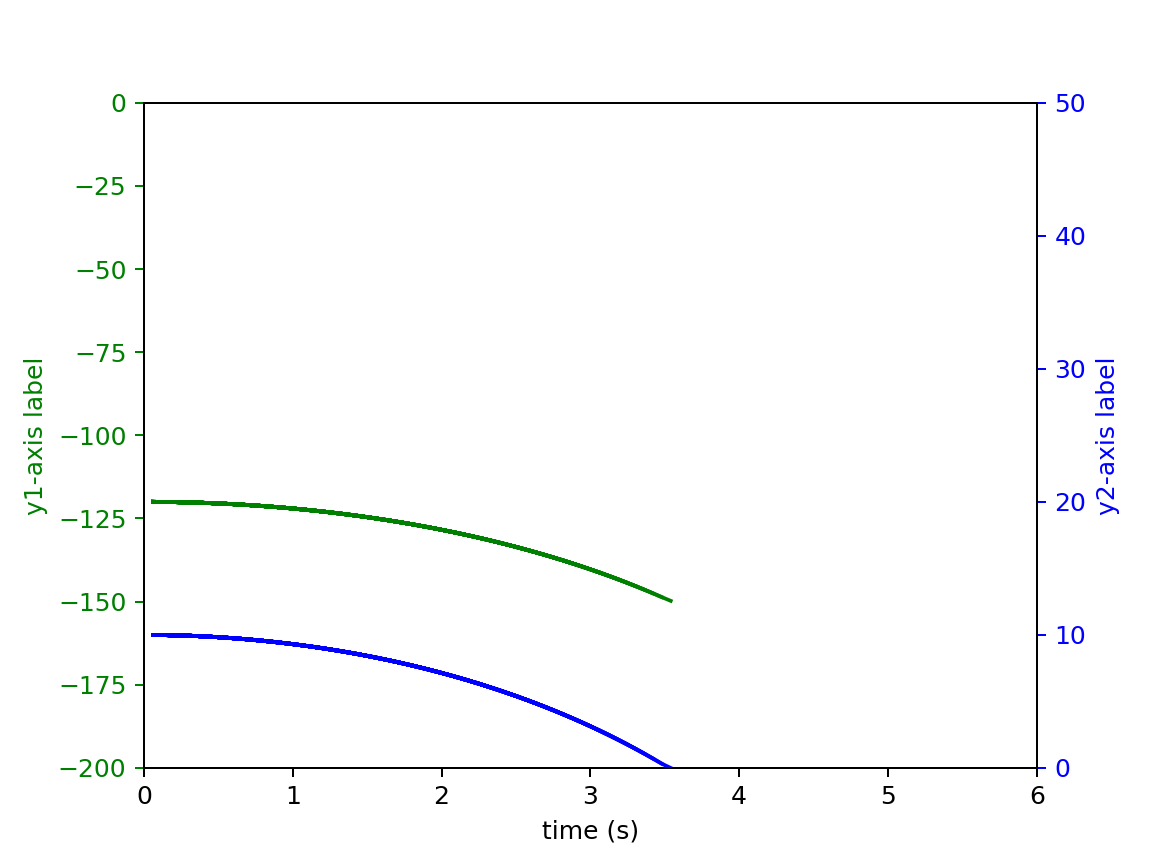

Episode =  120, total reward = -7639.773
Episode =  121, total reward = -7786.034
Episode =  122, total reward = -7781.781
Episode =  123, total reward = -7773.216
Episode =  124, total reward = -7782.366
Episode =  125, total reward = -7785.677
Episode =  126, total reward = -7779.154
Episode =  127, total reward = -7782.487
Episode =  128, total reward = -7785.857
Episode =  129, total reward = -7778.747
Episode =  130, total reward = -7783.641
Episode =  131, total reward = -7780.449
Episode =  132, total reward = -7783.221
Episode =  133, total reward = -7783.397
Episode =  134, total reward = -7777.567
Episode =  135, total reward = -7779.102
Episode =  136, total reward = -7643.583
Episode =  137, total reward = -7636.511
Episode =  138, total reward = -7639.554
Episode =  139, total reward = -7779.187


<IPython.core.display.Javascript object>


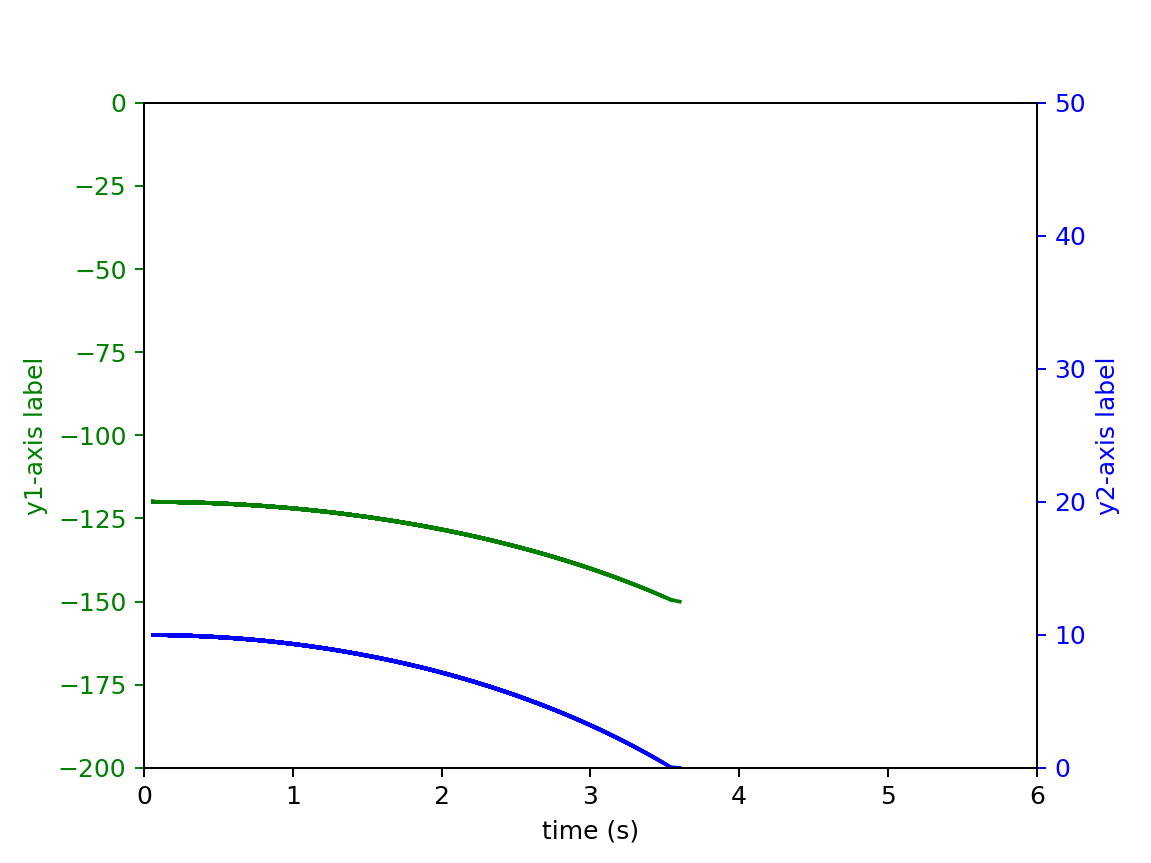

Episode =  140, total reward = -7783.060
Episode =  141, total reward = -7782.035
Episode =  142, total reward = -7637.051
Episode =  143, total reward = -7777.974
Episode =  144, total reward = -7641.085
Episode =  145, total reward = -7782.657
Episode =  146, total reward = -7635.743
Episode =  147, total reward = -7639.345
Episode =  148, total reward = -7783.725
Episode =  149, total reward = -7637.935
Episode =  150, total reward = -7780.042
Episode =  151, total reward = -7634.472
Episode =  152, total reward = -7779.477
Episode =  153, total reward = -7635.638
Episode =  154, total reward = -7782.185
Episode =  155, total reward = -7641.853
Episode =  156, total reward = -7637.463
Episode =  157, total reward = -7637.210
Episode =  158, total reward = -7637.629
Episode =  159, total reward = -7781.927


<IPython.core.display.Javascript object>


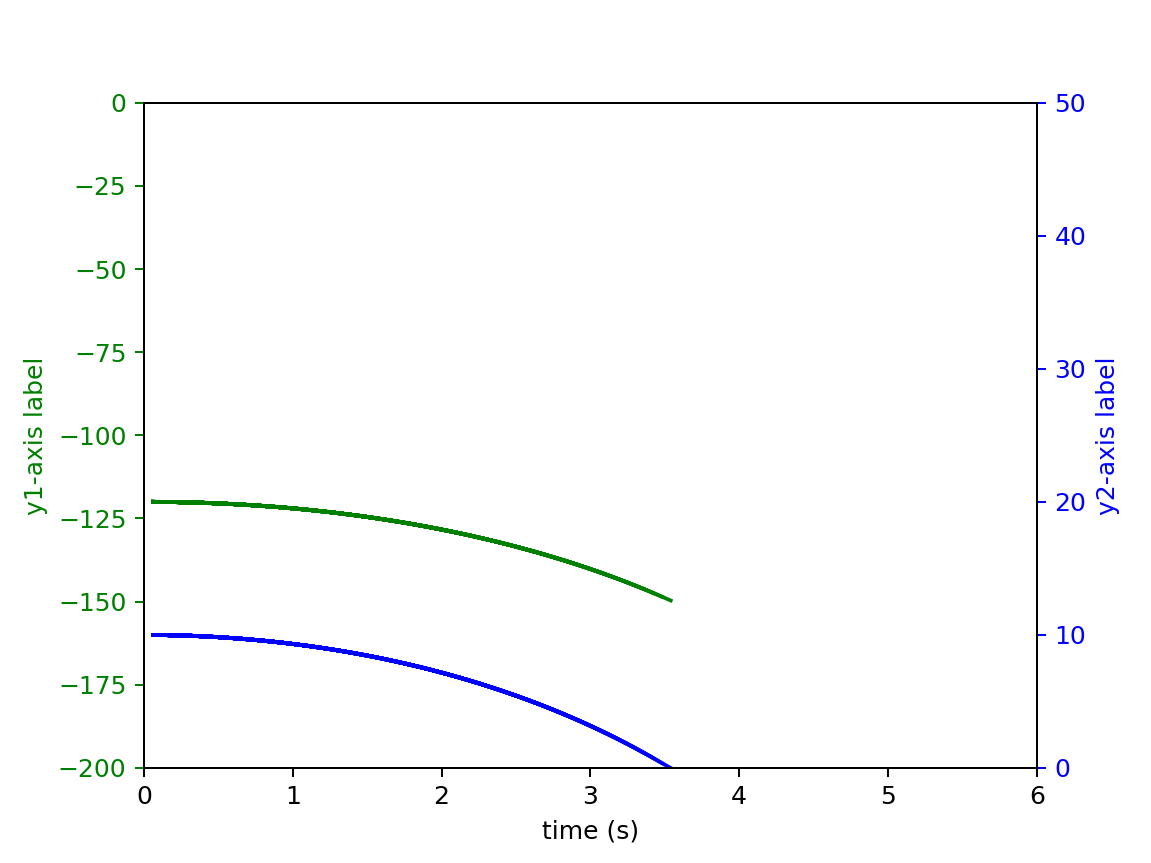

Episode =  160, total reward = -7636.009
Episode =  161, total reward = -7783.087
Episode =  162, total reward = -7774.127
Episode =  163, total reward = -7634.773
Episode =  164, total reward = -7779.563
Episode =  165, total reward = -7778.797
Episode =  166, total reward = -7784.172
Episode =  167, total reward = -7642.405
Episode =  168, total reward = -7782.525
Episode =  169, total reward = -7641.984
Episode =  170, total reward = -7637.752
Episode =  171, total reward = -7635.356
Episode =  172, total reward = -7780.940
Episode =  173, total reward = -7634.967
Episode =  174, total reward = -7780.743
Episode =  175, total reward = -8035.729
Episode =  176, total reward = -8032.218
Episode =  177, total reward = -8036.178
Episode =  178, total reward = -8031.300
Episode =  179, total reward = -8032.606


<IPython.core.display.Javascript object>


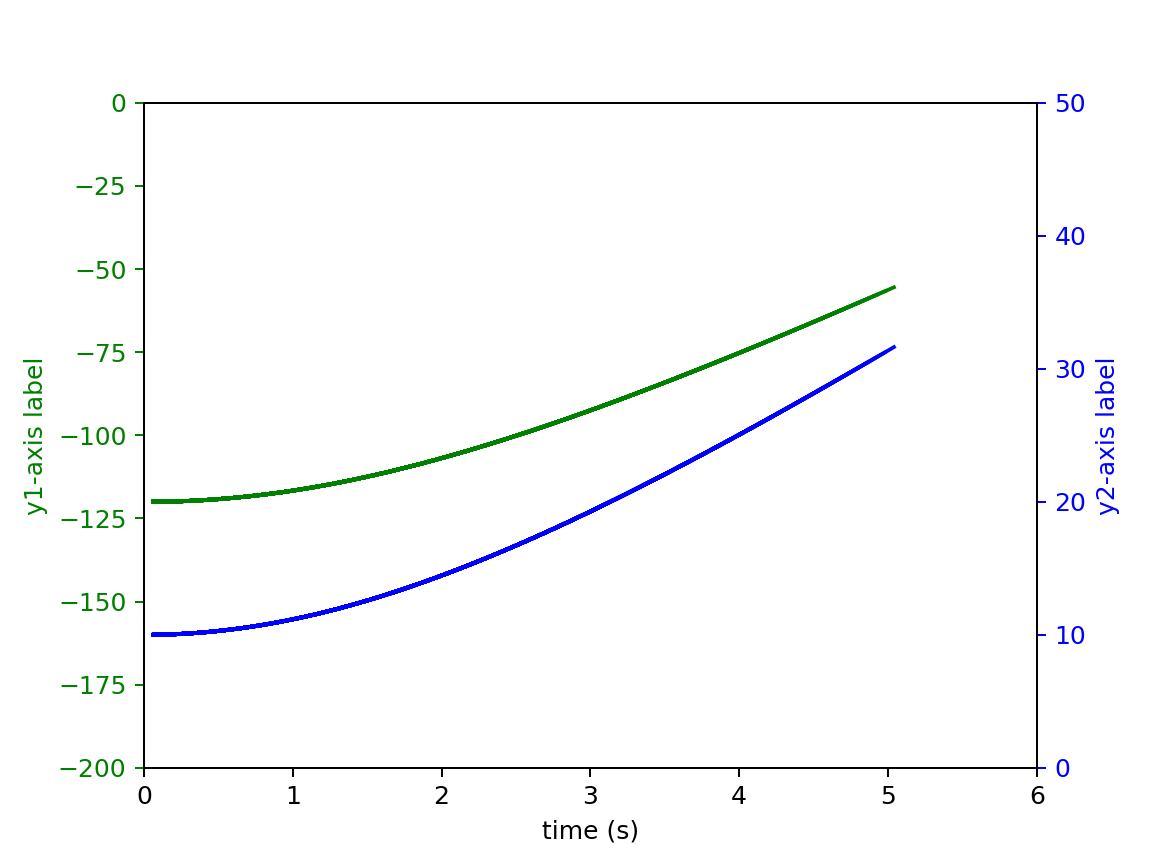

Episode =  180, total reward = -8021.155
Episode =  181, total reward = -8036.073
Episode =  182, total reward = -8039.415
Episode =  183, total reward = -8030.855
Episode =  184, total reward = -8035.775
Episode =  185, total reward = -8034.610
Episode =  186, total reward = -8027.879
Episode =  187, total reward = -8035.960
Episode =  188, total reward = -8037.340
Episode =  189, total reward = -8031.765
Episode =  190, total reward = -8034.338
Episode =  191, total reward = -8035.192
Episode =  192, total reward = -8043.283
Episode =  193, total reward = -8034.023
Episode =  194, total reward = -8028.941
Episode =  195, total reward = -8030.481
Episode =  196, total reward = -8037.763
Episode =  197, total reward = -8034.368
Episode =  198, total reward = -8038.844
Episode =  199, total reward = -8047.750


<IPython.core.display.Javascript object>


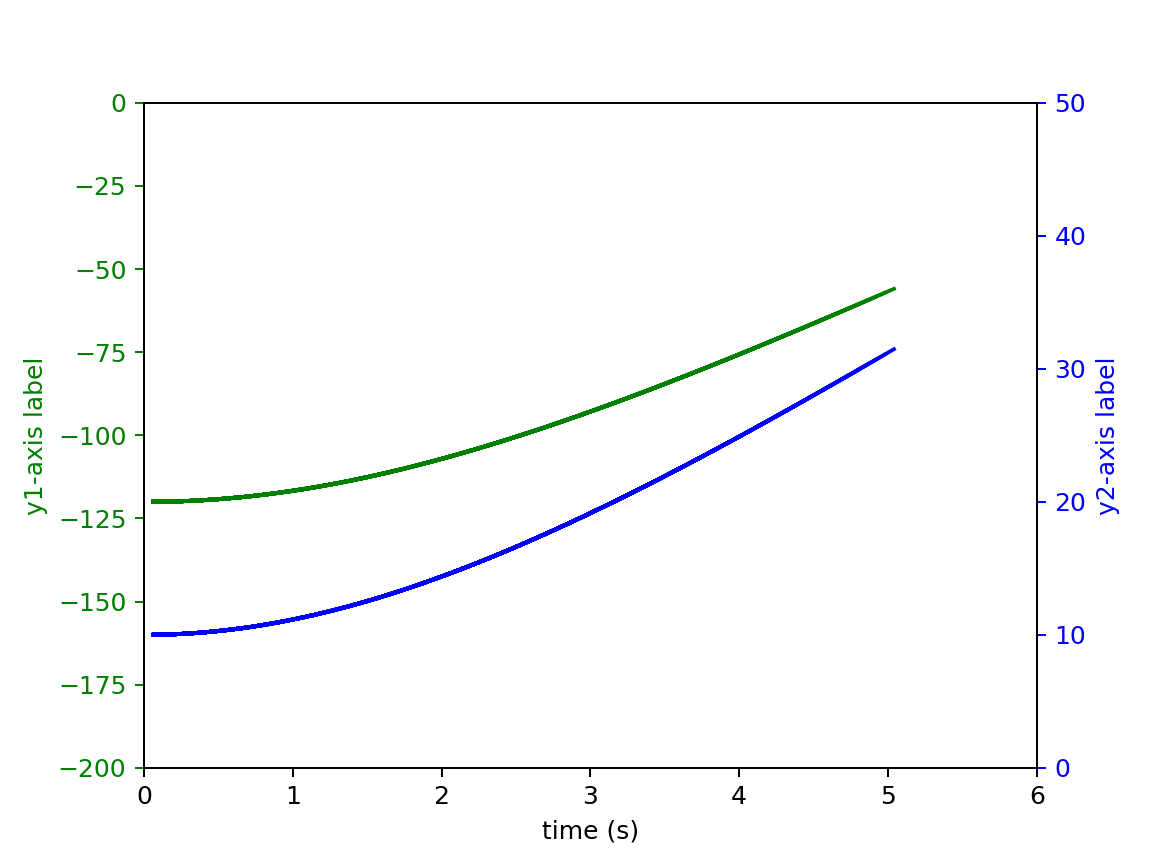

Episode =  200, total reward = -8043.169
Episode =  201, total reward = -8038.174
Episode =  202, total reward = -8045.716
Episode =  203, total reward = -8035.322
Episode =  204, total reward = -8037.477
Episode =  205, total reward = -8042.872
Episode =  206, total reward = -8038.298
Episode =  207, total reward = -8048.030
Episode =  208, total reward = -8032.462
Episode =  209, total reward = -8036.776
Episode =  210, total reward = -8032.287
Episode =  211, total reward = -8029.127
Episode =  212, total reward = -8053.237
Episode =  213, total reward = -8037.620
Episode =  214, total reward = -8023.764
Episode =  215, total reward = -8032.647
Episode =  216, total reward = -8044.262
Episode =  217, total reward = -8044.152
Episode =  218, total reward = -8036.753
Episode =  219, total reward = -8033.106


<IPython.core.display.Javascript object>


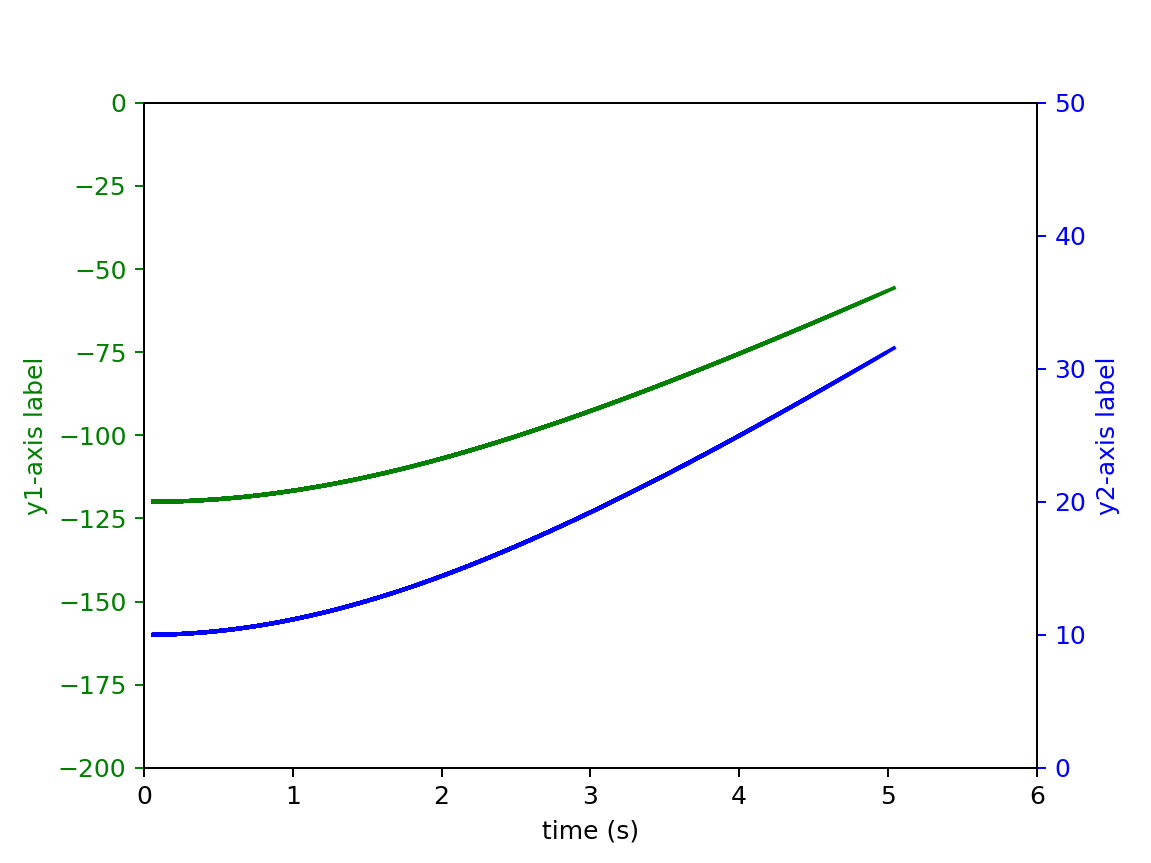

Episode =  220, total reward = -8032.789
Episode =  221, total reward = -8042.179
Episode =  222, total reward = -8025.529
Episode =  223, total reward = -8022.353
Episode =  224, total reward = -8039.525
Episode =  225, total reward = -8042.447
Episode =  226, total reward = -8040.467
Episode =  227, total reward = -8044.215
Episode =  228, total reward = -8031.923
Episode =  229, total reward = -8032.107
Episode =  230, total reward = -8035.282
Episode =  231, total reward = -8044.660
Episode =  232, total reward = -8041.883
Episode =  233, total reward = -8035.081
Episode =  234, total reward = -8032.166
Episode =  235, total reward = -8036.083
Episode =  236, total reward = -8031.276
Episode =  237, total reward = -8038.519
Episode =  238, total reward = -8034.291
Episode =  239, total reward = -8031.888


<IPython.core.display.Javascript object>


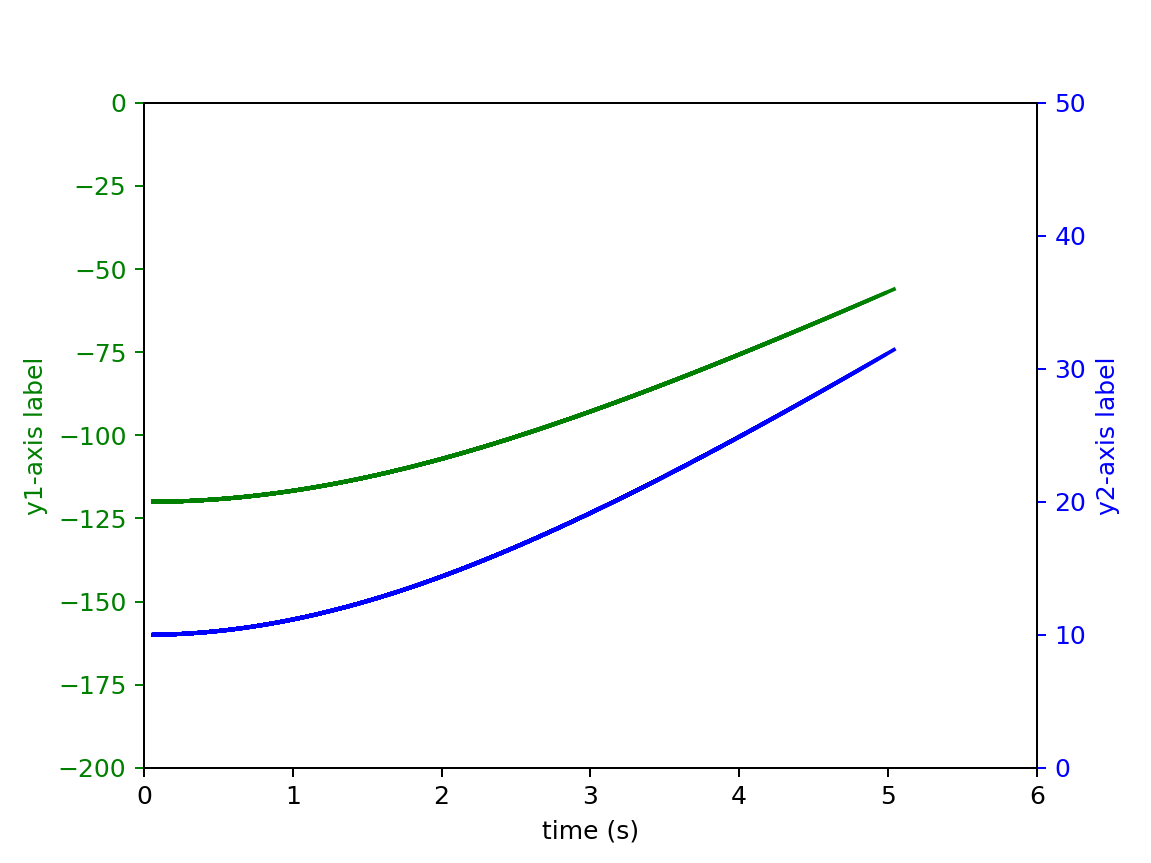

Episode =  240, total reward = -8044.366
Episode =  241, total reward = -8023.142
Episode =  242, total reward = -8044.977
Episode =  243, total reward = -8031.741
Episode =  244, total reward = -8032.294
Episode =  245, total reward = -8037.940
Episode =  246, total reward = -8051.857
Episode =  247, total reward = -8035.090
Episode =  248, total reward = -8027.672
Episode =  249, total reward = -8040.684
Episode =  250, total reward = -8036.670
Episode =  251, total reward = -8019.661
Episode =  252, total reward = -8045.965
Episode =  253, total reward = -8027.979
Episode =  254, total reward = -8029.642
Episode =  255, total reward = -8040.602
Episode =  256, total reward = -8043.145
Episode =  257, total reward = -8033.528
Episode =  258, total reward = -8037.011
Episode =  259, total reward = -8040.586


<IPython.core.display.Javascript object>


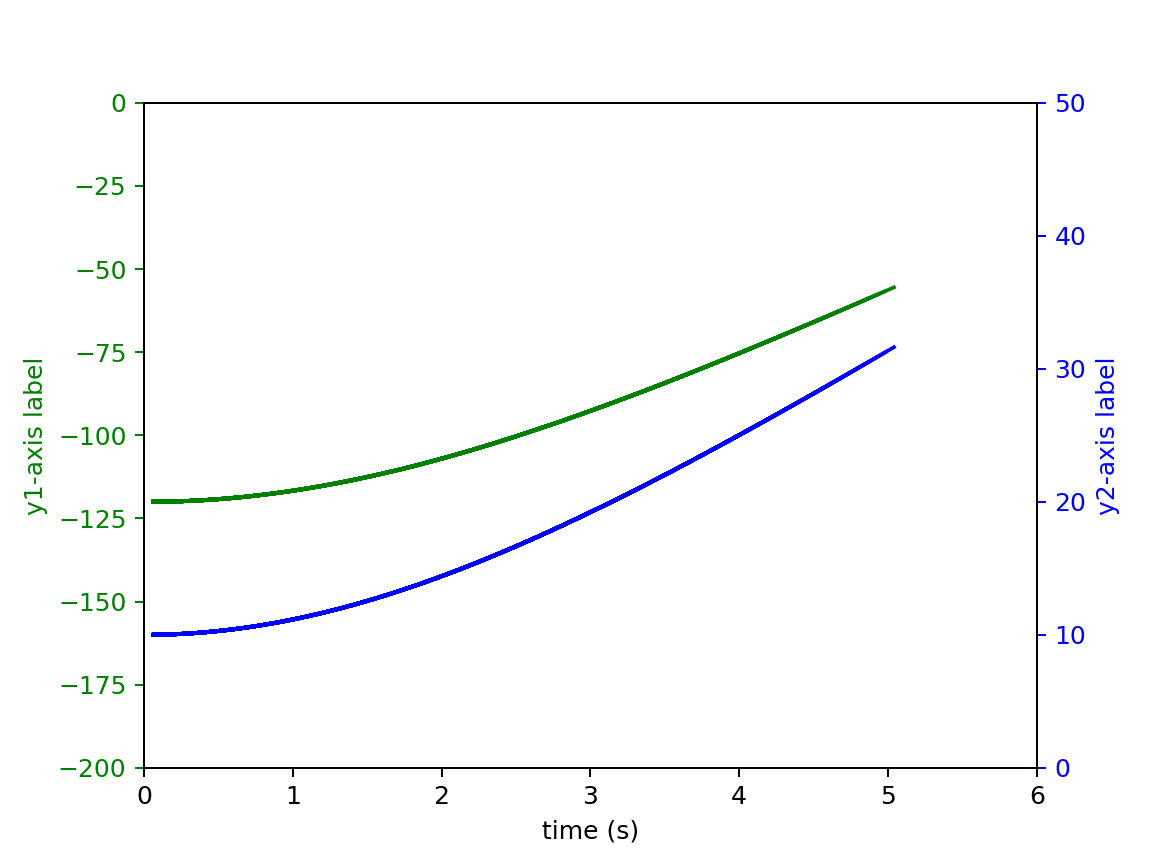

Episode =  260, total reward = -8028.669
Episode =  261, total reward = -8034.218
Episode =  262, total reward = -8035.834
Episode =  263, total reward = -8028.211
Episode =  264, total reward = -8035.781
Episode =  265, total reward = -8046.891
Episode =  266, total reward = -8042.904
Episode =  267, total reward = -8044.063
Episode =  268, total reward = -8050.172
Episode =  269, total reward = -8043.044
Episode =  270, total reward = -8042.225
Episode =  271, total reward = -8032.479
Episode =  272, total reward = -8038.863
Episode =  273, total reward = -8029.895
Episode =  274, total reward = -8032.790
Episode =  275, total reward = -8031.866
Episode =  276, total reward = -8044.871
Episode =  277, total reward = -8034.699
Episode =  278, total reward = -8029.647
Episode =  279, total reward = -8026.291


<IPython.core.display.Javascript object>


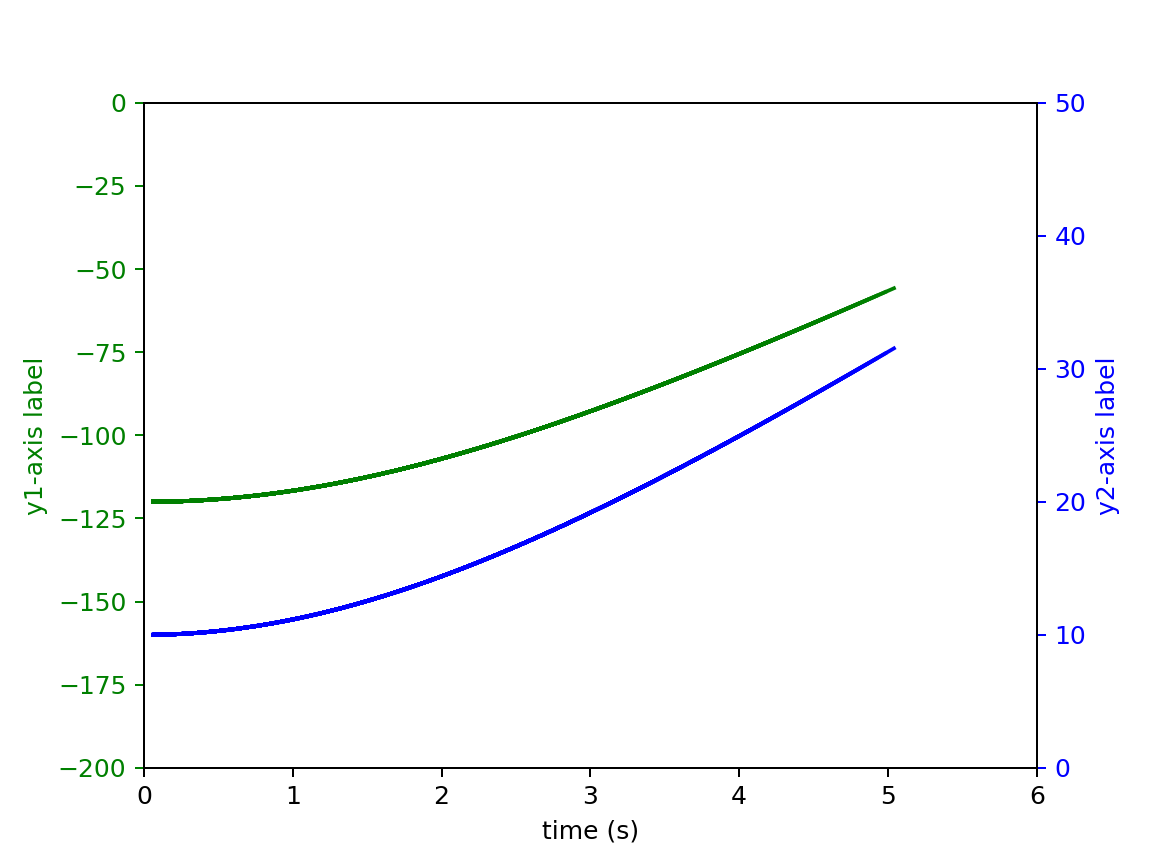

Episode =  280, total reward = -8036.692
Episode =  281, total reward = -8027.419
Episode =  282, total reward = -8027.742
Episode =  283, total reward = -8037.033
Episode =  284, total reward = -8024.745
Episode =  285, total reward = -8039.421
Episode =  286, total reward = -8033.763
Episode =  287, total reward = -8032.672
Episode =  288, total reward = -8027.206
Episode =  289, total reward = -8034.515
Episode =  290, total reward = -8037.506
Episode =  291, total reward = -8043.404
Episode =  292, total reward = -8025.887
Episode =  293, total reward = -8044.974
Episode =  294, total reward = -8017.183
Episode =  295, total reward = -8042.099
Episode =  296, total reward = -8024.636
Episode =  297, total reward = -8035.207
Episode =  298, total reward = -8040.031
Episode =  299, total reward = -8031.149


<IPython.core.display.Javascript object>


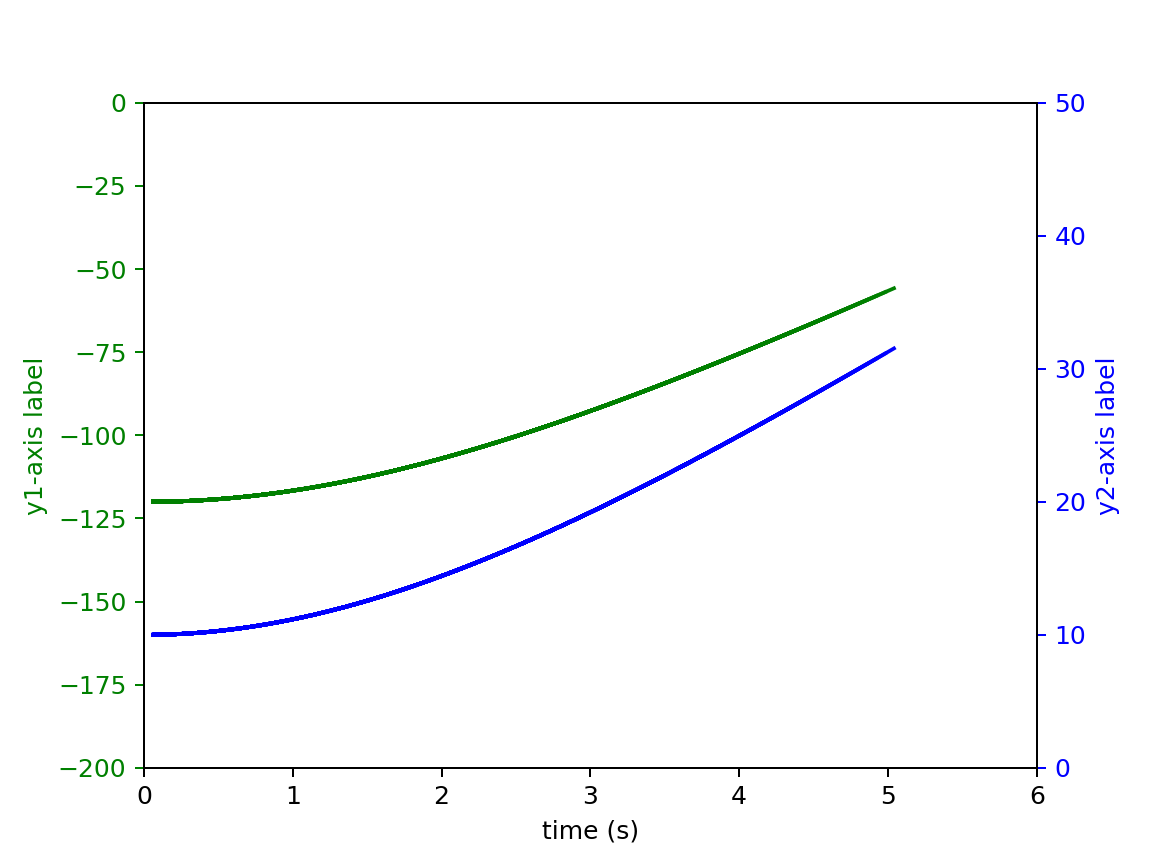

Episode =  300, total reward = -8032.552


In [2]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import sys
import numpy as np
import pandas as pd
from agents.agent import DDPG
from task import Task

# quadcopter values
time_limit = 6
y1_lower = -200
y1_upper = 0
y2_lower = 0
y2_upper = 50

num_episodes = 300
init_pose = [0., 0., 10., 0., 0., 0.]
init_velocities = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]
target_pos = np.array([0., 0., 50.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

total_rewards = []

display_freq = 20
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    total_reward = 0
    step = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        step += 1
        # within the episode loop
        if display_graph:
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
            
            #if step % display_step_freq == 0:
            plt_dynamic(fig, sub1, sub2, x, y1, y2)
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
            total_rewards.append(total_reward)
            break


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

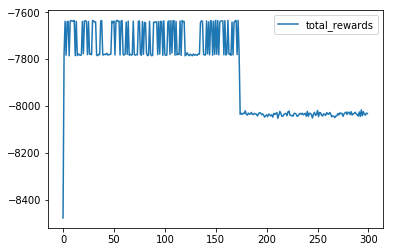

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(total_rewards)),  total_rewards, label='total_rewards')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: There were two tasks that I trained the agent on. One task was the pendulum task from the OpenAI gym. It was a good choice to train since it had a continuous reward function which made it easier to train than the mountain car. I left the reward function as the default and created a PendulumTask class as an interface to the gym simulator. I used an action repeat of 3 and had the task run for 300 time steps per episode. 

After the agent made significant progress on the pendulum task I switched over to the quadcopter task. There were a number of modifications that I made to the original task based on information in Slack and the forum. One change was to constrain all rotor speeds to the same speed. The task I was working on was take off and the simulator created a lot of instability when the rotor speeds were even slightly different. This seemed like a lot for an agent to learn in a small number of episodes. I also constrained the rotor speeds to 375 to 450 since these were the speeds where the copter would go up or down at a reasonable rate. This task also had an action repeat of 3. 

For the takeoff task I set the original position to \[0, 0, 10\] so that the simulator wouldn't think that the copter had crashed already. I set the target position to \[0, 0, 100\] so that the copter wouldn't run out of room to rise before the end of the episode. The reward function was set to -abs(target_z - actual_z). This rewarded the copter for getting as close as it could to the target position vertically.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The only algorithm that I tried was DDPG since it seemed well suited to the problem. The DDPG paper explained how the algorithm could be used on a variety of control tasks in a continuous space. The paper also suggested network architectures and hyper-parameters to try.

The DDPG algorithm needed some tuning before it was able to work well with the pendulum and copter tasks. One problem that the agent had was not exploring enough in the early stages of learning. In order to increase the amount of exploration I doubled the noise process parameters suggested in the paper to theta=0.3 and sigma=0.4. This helped the agent explore more initially. Another parameter that was increased from the paper was tau. The suggested value was 0.001, however this level of adaptation from the off-policy network would mean very long training sessions and slow learning. I increased tau to 0.01 so that the agent could adapt faster based on what it learned from the environment. The learning rate that I ended up with on both the Actor and Critic networks was 0.02. This is higher that I would normally use, but the networks seemed to learn fine even with a higher learning rate. 

The neural network that I built was based on the architecture specified in the DDPG paper. They used two dense layers with 400 and 300 nodes respectively. This turned out to train extremely slowly so I reduced the number of nodes to 200 and 150 and then added another dense layer of 100. The paper also specified that batch normalization and drop out was used so I added those features to the layers. The drop out rate was set at 0.3. The batch normalization helped the agent learn since the network values were scaled to be proportional across all variables. It did add considerable training time to each episode, though, so overall training happened much slower. All of the layers used a ReLU activation function since those worked well in other projects.

To decrease the training time I got the agent training on the AWS GPU EC2 instance that I have been using for class. I was hoping that this would dramatically speed up the training time, but the speed increase was negligible. I ended up doing all of the training on my laptop for convenience.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: Initally without any constraints on rotation speed or the relationship of rotor speeds the task was extremely hard to train. Even running for 1000 episodes it didn't seem to learn much. Once the task was constrained to a more reasonable action space then the agent was able to learn.

Most of the learning appeared to happen suddenly. The copter was crashing for the first 170 episodes of the training. Then suddenly it learned how to take off and it could take off consistently after that. The rewards in the first episodes were higher because the copter crashed ending the episode and all of the rewards for the episode didn't accumulate. Because the reward function is always negative the copter wasn't punished as much as it should have been after the crash. The rewards in the first episodes oscillated between -7600 and -7800. After the agent learned to take off the rewards were consistently at -8000.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: There were many challenging aspects to this project. The most difficult part was the level of ambiguity in how to proceed with the project. Fortunately there were helpful classmates that gave suggestions on how to approach the project. Without that I would have been even more lost to begin with.

Another difficult part of the project was getting to the point that I could see what was going on while the agent trained. Again a classmate had posted some helpful code on how to create real-time plots to watch the agent train inside of an episode. Getting to the point where I could watch my agent miserably fail took a lot of effort, but once I could watch what was happening it was easier to iterate and make changes to improve it.

Overall this was by far the most difficult project of this course. It took a long time to get on the right track. Now that it is over, though, I feel like I have learned a lot about reinforcement learning because of having to try so many things and go over all of the details of the task and agent.
